### Understanding the Broadband Outage Detection  Problem and the Dataset


#### The basic idea is analyzing the <font color=blue>Buisness Problem of India Broadband </font> to get a fair idea about the factors affecting theusage of Broadbands  due to  diferent outage durations  based on various features which we will discuss as we go ahead.


# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Analysis:** <br>
  - Data type Conversion
  - Missing Values
  - All The Numerical Variables
  - Distribution of the Numerical Variables
  - Categorical Variables
  - Cardinality of Categorical Variables
  - Outliers.  <br>

4. **Data Visualization:** Using plots to find relations between the features.

 - ***Univaraite anlysis:***
 - Area_code, broadband type and outage type logtype and server type analyis with respect to each class of outage duration.<br>
  *** Bivariate Analysis:***
 - Broadband types causing long and short outage duration
 - outage types reponsible for more outage causing
 - Volume spread for long,short,no outgae duartion
 - How broadband types and Outage types are related to outage
 - Which broadband type has more outages in which outage types
 - How volume and outag types are related to broadband types
 - Area code having more volume in which broadbnad type
3. **Mode Building**
 - ***Feature Engneering Method1***
 - Merging the data by creating dummies of all categorical features 
 - Random Forest Regression
 - gradient Boosting
 - XGB
 - Model was overfiiting due to high dimensional space and  high imbalnce in the data so I used sampling  methods like SMOTE
   for controlling imbalance and Fetaure selction technique like feature importance for high dimensional space<br>
  ***Feature Engneering Method2***
 - used label encoding for all categorical features
 - Logistic
 - Xgb
 - Hyperparameter tuning of RF using random search CV
 - LGBM
 - Catboost
 - Even though we reduce the feature space the results are very poor<br>
   ***Feature Engneering Method3***
 - Making all the categorical featured into Numeric and applied standard sacling
 - Used corr plot to remove the corelated features but there is very less corelation so not removed any feature
 - Used OVR and OVO srartegy splits to remove misclassifiaction of samples
 - But the results are not very good<br>
   ***Feature Engneering Method4***
 - converted volume as categorical and created dummies along with other categorical features
 - Random Forest
 - Logistic regression
 - GBM
 - XGB
 - LGBM
 - Catboost
 - Stacking Classifier
 - Upvoting Classifier
 - results are good for Soft voting classifer and submiitd the preductions with this model<br><br>
 5.****Model Comaprision****<br><br>
 6.**** Model Performance and Evalution****<br><br>
 7.**** Submiision File *****


 



### Import required modules

In [592]:
## Data Analysis Phase
## Main Aim is to understand more about the data

import pandas as pd
import numpy as np
##visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
##plotly
import plotly.express as px

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## In Data Analysis We will Analyze To Find out the below stuff
0. Data type Conversion
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers


### Loading The DataSet

#### Broadband Data

In [593]:
# read the data
broadband_data=pd.read_csv('./data/broadband_data.csv')

## print shape of dataset with rows and columns
print(broadband_data.shape)

##print glimpse of the data
broadband_data.head()

(21076, 2)


,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


#### Getting information about the dataset


In [594]:
##lets quickly see the basic details from broadband data
##checking the data types 
broadband_data.dtypes

id                 int64
broadband_type    object
dtype: object

In [595]:
##lets check is there any missing values in the data
broadband_data.isna().sum()
##no missing values found

id                0
broadband_type    0
dtype: int64

In [596]:
##lets check unique categories of broadband type
len(broadband_data.broadband_type.value_counts())
##there are 10 categories of broadbands out of which type 8 and 2 are more

10

#### Outage Data

In [598]:
# read the data
outage_data=pd.read_csv('./data/outage_data.csv')

## print shape of dataset with rows and columns
print(outage_data.shape)

##print glimpse of the data
outage_data.head()


(18552, 2)


,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1


#### Getting information about the dataset


In [599]:
##lets quickly see the basic details from outage data
##checking the data types 
outage_data.dtypes

id              int64
outage_type    object
dtype: object

In [600]:
##lets check is there any missing values in the data
outage_data.isna().sum()
##no missing values found

id             0
outage_type    0
dtype: int64

In [601]:
##lets check unique categories in outage type
len(outage_data.outage_type.value_counts())
##there are 5 categories of outage types

5

#### Report Data 

In [602]:
# read the data
report_data=pd.read_csv('./data/report_data.csv')

## print shape of dataset with rows and columns
print(report_data.shape)

##print glimpse of the data
report_data.head()

(58671, 3)


,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


#### Getting information about the dataset


In [603]:
##lets quickly see the basic details from report data
##checking the data types 
report_data.dtypes

id                  int64
log_report_type    object
volume              int64
dtype: object

In [604]:
##lets check is there any missing values in the data
report_data.isna().sum()
##no missing values found

id                 0
log_report_type    0
volume             0
dtype: int64

In [605]:
##lets check unique categories in outage type
len(report_data.log_report_type.value_counts())
##there are 386 categories of log report types

386

## Server Data

In [606]:
# read the data
server_data=pd.read_csv('./data/server_data.csv')

## print shape of dataset with rows and columns
print(server_data.shape)

##print glimpse of the data
server_data.head()

(31170, 2)


,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


#### Getting information about the dataset


In [607]:
##lets quickly see the basic details from server data
##checking the data types 
server_data.dtypes

id                      int64
transit_server_type    object
dtype: object

In [608]:
##lets check is there any missing values in the data
server_data.isna().sum()
##no missing values found

id                     0
transit_server_type    0
dtype: int64

In [609]:
##lets check unique categories in outage type
len(server_data.transit_server_type.value_counts())
##there are 53 categories of server types

53

### Train Data

In [610]:
# read the data
train_data=pd.read_csv('./data/train_data.csv')

## print shape of dataset with rows and columns
print(train_data.shape)

##print glimpse of the data
train_data.head()

(5904, 3)


,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


#### Getting information about the dataset


In [611]:
##lets check is there any missing values in the data
train_data.isna().sum()
##no missing values found

id                 0
area_code          0
outage_duration    0
dtype: int64

In [612]:
##lets quickly see the basic details from server data
##checking the data types 
train_data.dtypes

id                  int64
area_code          object
outage_duration     int64
dtype: object

In [613]:
##lets check unique categories in train data
len(train_data.area_code.value_counts())
##there are 876 categories of Area codes

876

### lets check the distribution of Target column

Text(0.5, 1.0, 'distribution of Outage duration Classes')

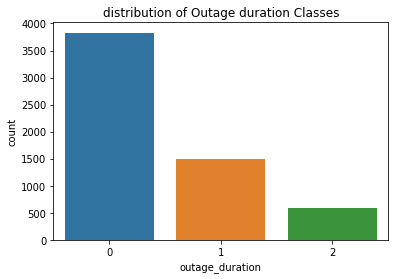

In [709]:
## to load this plot internet is mandatory
#px.pie(data_frame = train_data ,names = final_data.outage_duration.value_counts().index,values = final_data.outage_duration.value_counts().values,
      #title = "Distribution Of Outage Duration  " ,hole = 0.6
      #)
sns.countplot(x="outage_duration", data=train_data)
plt.title("distribution of Outage duration Classes")

In [615]:
##outage_duration must be object 
final_data['outage_duration']=final_data['outage_duration'].astype('object')

### Distribution of numerical variables

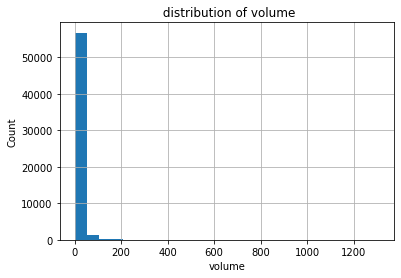

In [616]:
## Lets analyse the discrete values by creating histograms to understand the distribution
report_data['volume'].hist(bins=25)
plt.xlabel("volume")
plt.ylabel("Count")
plt.title(" distribution of volume")
plt.show()

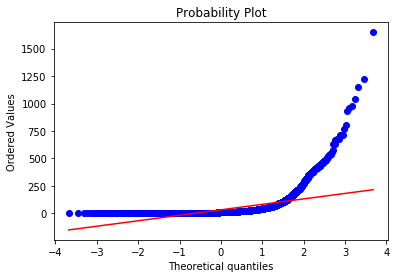

In [617]:
###There is some skwness in the volume

#### distribution of the volume using the Q-Q plot
import pylab 
import scipy.stats as stats
stats.probplot(final_data.volume, dist="norm", plot=pylab)
pylab.show()

#### Both from the histogram and from the Q-Qplot it is clear that volume does not follow a Gaussian distribution.

### Lets Find the realtionship between Numerical variables and outage_duration

Text(0.5, 1, 'outage  duration vs volume')

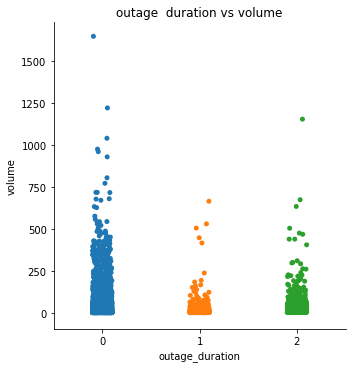

In [618]:
sns.catplot(x="outage_duration", y="volume", data=final_data);
plt.title('outage  duration vs volume')

#### Most of the volume was recorded for Outage duration 0 and 2 followed by 1

### Outliers

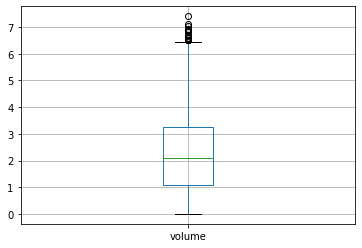

In [619]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).
# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

data=final_data.copy()
if 0 in data['volume'].unique():
    pass
else:
    data['volume']=np.log(data['volume'])
    data.boxplot(column='volume')
    plt.show()
    
##There are outliers in the data

In [620]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = data.volume.quantile(0.75) - data.volume.quantile(0.25)

Lower_fence = data.volume.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.volume.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(6.4973229120515406, -2.140614085361949, 2.1594842493533726)

### Converting  objects into categories
The categorical data type is useful in the following cases:

<ul>
<li>A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.</li>
<li>The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.</li>
<li>As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).</li>
</ul>

In [621]:
##converting into categories
train_data['outage_duration']=train_data['outage_duration'].astype('category')
train_data['area_code']=train_data['area_code'].astype('category')
broadband_data['broadband_type']=broadband_data['broadband_type'].astype('category')
outage_data['outage_type']=outage_data['outage_type'].astype('category')
report_data['log_report_type']=report_data['log_report_type'].astype('category')
server_data['transit_server_type']=server_data['transit_server_type'].astype('category')

# Visualizations

### Univariate Analysis
Finding the Patterns in the data by using each of the feature one at a time.


#### Findings from the Below plots
Broadband type and area-code with respect to outage_duartion
<ul>
    <li>Broadband Type 8 was more prone to short and long outages</li>
    <li>In Area_code 1100 more long outage was occuring </li>  
</ul>

In [622]:
##Let's see how the broadband types and area_code related with the outage duration
##merge train and broadband data to explore 
train_brd=pd.merge(train_data,broadband_data,on="id",how="left")
train_brd.head()
##data obtained from train_data and broadband_data

,id,area_code,outage_duration,broadband_type
0,13366,area_415,1,broadband_type_2
1,6783,area_474,0,broadband_type_2
2,9519,area_931,1,broadband_type_8
3,10202,area_700,1,broadband_type_8
4,4555,area_600,2,broadband_type_8


In [623]:
##let's look one by one i.e we will split the data based on no outage
train_brd_out0=train_brd[train_brd['outage_duration']==0]#no outage
train_brd_out1=train_brd[train_brd['outage_duration']==1]#short outage
train_brd_out2=train_brd[train_brd['outage_duration']==2]#long outage

Text(0, 0.5, 'count')

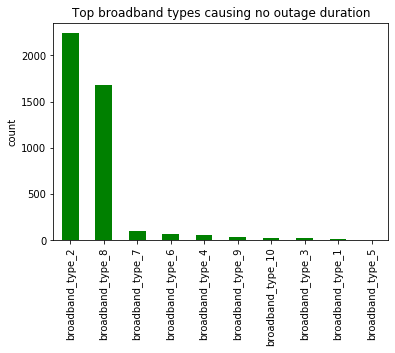

In [624]:
##lets plot the top braodband types causing no outage duartion
train_brd_out0['broadband_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='g')
plt.title('Top broadband types causing no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

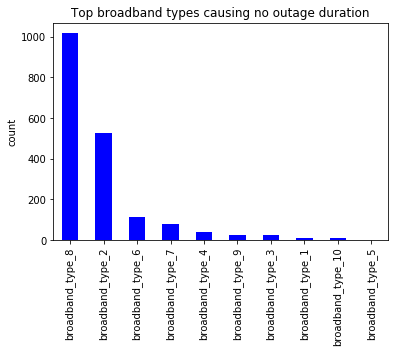

In [625]:
##lets plot the top broadband types causing  short duartion
train_brd_out1['broadband_type'].value_counts().sort_values(ascending=False).sort_values(ascending=False).head(10).plot.bar(color='b')
plt.title('Top broadband types causing no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

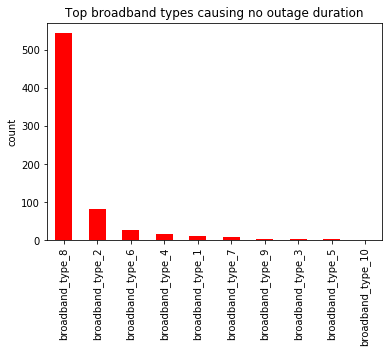

In [626]:
##lets plot the top braodband types causing long outage duartion
train_brd_out2['broadband_type'].value_counts().head(10).sort_values(ascending=False).sort_values(ascending=False).plot.bar(color='r')
plt.title('Top broadband types causing no outage duration')
plt.ylabel('count')

#### Now its time to look which areas are  more prone to outage duartion 

Text(0, 0.5, ' Area Count')

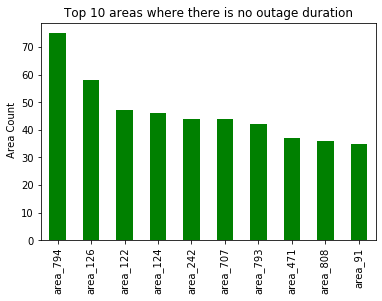

In [627]:
##lets plot the top 10 Areas which there no outage duartion
train_brd_out0['area_code'].value_counts().head(10).sort_values(ascending=False).plot.bar(color='g')
plt.title('Top 10 areas where there is no outage duration')
plt.ylabel(' Area Count')

Text(0, 0.5, ' Area Count')

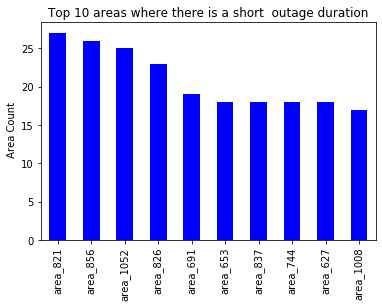

In [628]:
##lets plot the top 10 Areas where there is a short duartion
train_brd_out1['area_code'].value_counts().head(10).sort_values(ascending=False).plot.bar(color='b')
plt.title('Top 10 areas where there is a short  outage duration')
plt.ylabel(' Area Count')

Text(0, 0.5, ' Area Count')

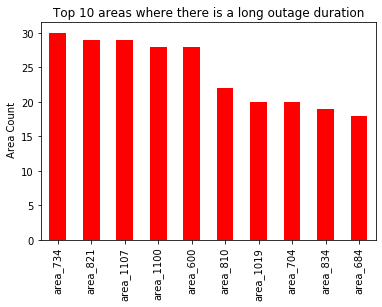

In [629]:
##lets plot the top 10 Areas where there is a long outage  duartion
train_brd_out2['area_code'].value_counts().head(10).sort_values(ascending=False).plot.bar(color='r')
plt.title('Top 10 areas where there is a long outage duration')
plt.ylabel(' Area Count')

#### Findings from the Below plots
Outage type with respect to outage_duartion
<ul>
    <li>Outage types 1 and 2 were causing to short and long outages</li>
</ul>

#### Let's see how the outage types and  area_code related with the outage duration


In [630]:
##merge train and broadband data to explore 
train_outype=pd.merge(train_data,outage_data,on="id",how="left")
train_outype.head()
##data obtained from train_data and broadband_data

,id,area_code,outage_duration,outage_type
0,13366,area_415,1,outage_type_4
1,6783,area_474,0,outage_type_2
2,9519,area_931,1,outage_type_2
3,10202,area_700,1,outage_type_1
4,4555,area_600,2,outage_type_2


In [631]:
##let's look one by one i.e we will split the data based on no outage,short and long
train_brd_out0=train_outype[train_outype['outage_duration']==0]#no outage
train_brd_out1=train_outype[train_outype['outage_duration']==1]#short outage
train_brd_out2=train_outype[train_outype['outage_duration']==2]#long outage

Text(0, 0.5, 'count')

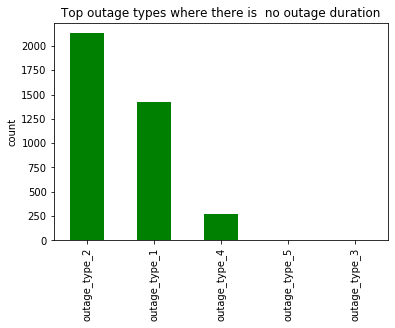

In [632]:
##lets plot the top outage types  where there is no outage duartion
train_brd_out0['outage_type'].value_counts().head().sort_values(ascending=False).plot.bar(color='g')
plt.title('Top outage types where there is  no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

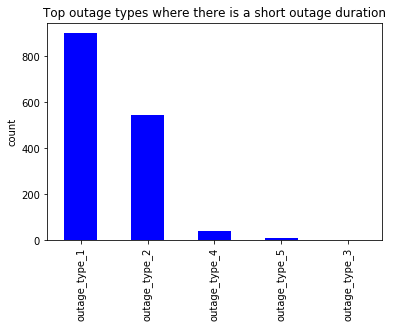

In [633]:
##lets plot the top outage types  where there is a short  outage duartion
train_brd_out1['outage_type'].value_counts().head().sort_values(ascending=False).plot.bar(color='b')
plt.title('Top outage types where there is a short outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

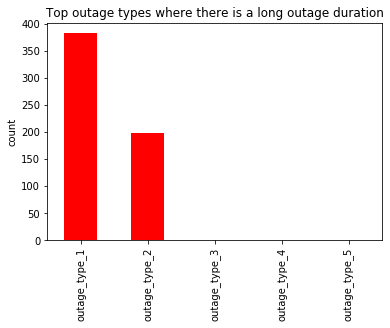

In [634]:
##lets plot the top outage types  where there is a long outage duartion
train_brd_out2['outage_type'].value_counts().sort_values(ascending=False).head().plot.bar(color='r')
plt.title('Top outage types where there is a long outage duration')
plt.ylabel('count')

#### Let's see how the log report  types and volume were   related with the outage duration

##### Findings from the Below plots
Volume,log report types  with respect to outage_duartion
<ul>
    <li>Very less recording data(Volume) present for both long and short ouatges</li>
    <li> log report types 82,203 were occuring more incase of short and long outage duration</li>
</ul>

In [635]:
##merge train and report data to explore 
train_report=pd.merge(train_data,report_data,on="id",how="left")
train_report.head()
##data obtained from train_data and report data

,id,area_code,outage_duration,log_report_type,volume
0,13366,area_415,1,log_report_type_312,1
1,6783,area_474,0,log_report_type_312,2
2,6783,area_474,0,log_report_type_233,1
3,6783,area_474,0,log_report_type_232,1
4,6783,area_474,0,log_report_type_315,2


In [636]:
##separating the data with respect to target class levels
train_report_dur_0=train_report[train_report['outage_duration']==0]#no outage
train_report_dur_1=train_report[train_report['outage_duration']==1]#short outage
train_report_dur_2=train_report[train_report['outage_duration']==2]#long outage

Text(0, 0.5, 'count')

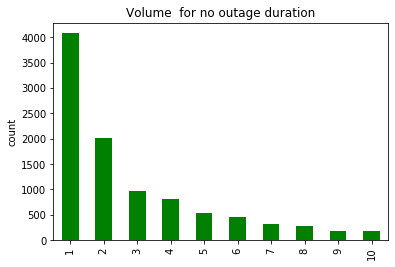

In [637]:
##lets see how volume was related to  no ouatge duration
train_report_dur_0['volume'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='g')
plt.title('Volume  for no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

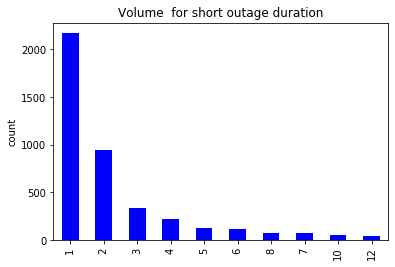

In [638]:
##lets see how volume was related to short ouatge duration
train_report_dur_1['volume'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='b')
plt.title('Volume  for short outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

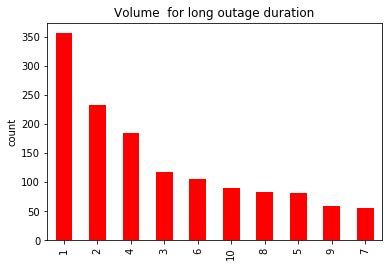

In [639]:
##lets see how volume was related to long  ouatge duration
train_report_dur_2['volume'].value_counts().head(10).sort_values(ascending=False).plot.bar(color='r')
plt.title('Volume  for long outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

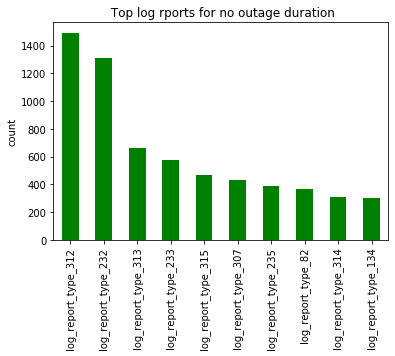

In [640]:
##lets see how log rports were related to ouatge duration
train_report_dur_0['log_report_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='g')
plt.title(' Top log rports for no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

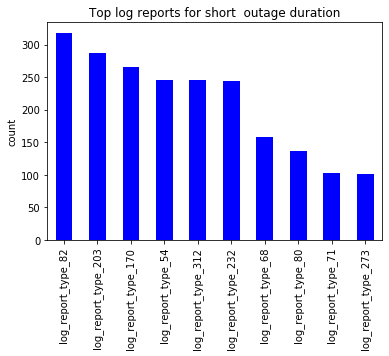

In [641]:
##lets see how volume was related to ouatge duration
train_report_dur_1['log_report_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='b')
plt.title('Top log reports for short  outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

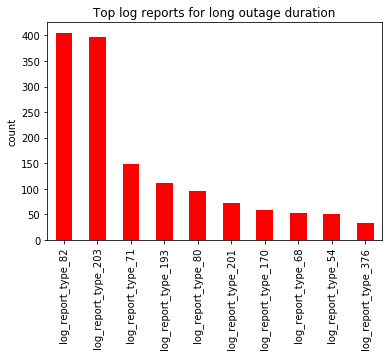

In [642]:
##lets see how volume was related to ouatge duration
train_report_dur_2['log_report_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='r')
plt.title('Top log reports for long outage duration')
plt.ylabel('count')

#### Let's see how theserver types and volume were related with the outage duration

##### Findings from the Below plots
server types  with respect to outage_duartion

<ul>
    <li> Server types 11,15 were  more incase of short and long outage duration</li>
</ul>

In [643]:
##merge train and server data to explore 
train_server=pd.merge(train_data,server_data, on="id",how="left")
train_server.head()
##data obtained from train_data and server data

,id,area_code,outage_duration,transit_server_type
0,13366,area_415,1,transit_server_type_35
1,6783,area_474,0,transit_server_type_35
2,6783,area_474,0,transit_server_type_34
3,9519,area_931,1,transit_server_type_15
4,10202,area_700,1,transit_server_type_11


In [644]:
##separating the data with respect to target class levels
train_server_dur_0=train_server[train_server['outage_duration']==0]#no outage
train_server_dur_1=train_server[train_server['outage_duration']==1]#short outage
train_server_dur_2=train_server[train_server['outage_duration']==2]#long outage

Text(0, 0.5, 'count')

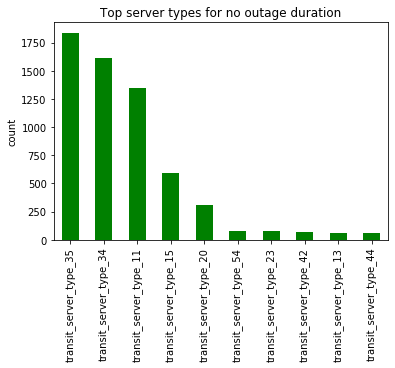

In [645]:
##lets see how server_type are causing no ouatge duartions
train_server_dur_0['transit_server_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='g')
plt.title('Top server types for no outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

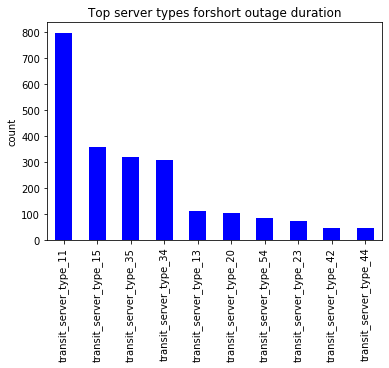

In [646]:
##lets see how server_type are causing no ouatge duartions
train_server_dur_1['transit_server_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='b')
plt.title('Top server types forshort outage duration')
plt.ylabel('count')

Text(0, 0.5, 'count')

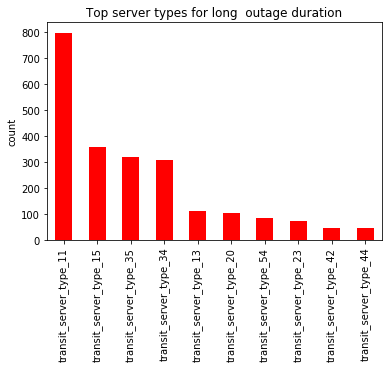

In [493]:
##lets see how server_type are causing no ouatge duartions
train_server_dur_1['transit_server_type'].value_counts().sort_values(ascending=False).head(10).plot.bar(color='r')
plt.title('Top server types for long  outage duration')
plt.ylabel('count')

## Bivariate analysis
finding the patterns in the data withrespective to each feature

In [647]:
##lets see how broadband type and logs are related with repsect to outage duartion
##for that we are merging train_data,broadband_data and report data
df_bivar=pd.merge(train_brd,report_data,on="id",how="left")
df_bivar.head()

,id,area_code,outage_duration,broadband_type,log_report_type,volume
0,13366,area_415,1,broadband_type_2,log_report_type_312,1
1,6783,area_474,0,broadband_type_2,log_report_type_312,2
2,6783,area_474,0,broadband_type_2,log_report_type_233,1
3,6783,area_474,0,broadband_type_2,log_report_type_232,1
4,6783,area_474,0,broadband_type_2,log_report_type_315,2


In [648]:
##lets split the data based on the target class
##separating the data with respect to target class levels
train_bivar_dur_0=df_bivar[df_bivar['outage_duration']==0]#no outage
train_bivar_dur_1=df_bivar[df_bivar['outage_duration']==1]#short outage
train_bivar_dur_2=df_bivar[df_bivar['outage_duration']==2]#long outage

In [649]:
##logs generaed for each broadband for 0 outage 
##ets see the below plot
train_bivar_dur_0.groupby('broadband_type').log_report_type.nunique()

broadband_type
broadband_type_1      25
broadband_type_10     36
broadband_type_2     167
broadband_type_3      18
broadband_type_4      32
broadband_type_5       0
broadband_type_6      32
broadband_type_7      43
broadband_type_8     197
broadband_type_9      25
Name: log_report_type, dtype: int64

Text(0, 0.5, 'unique count of log types')

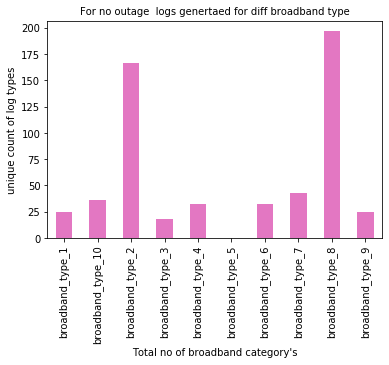

In [650]:
##lets see how broadband type and log type were related with outage duration 0
g=train_bivar_dur_0.groupby('broadband_type').log_report_type.nunique().plot.bar(color="#e377c2")
g.set_title("For no outage  logs genertaed for diff broadband type", fontsize=10)
g.set_xlabel("Total no of broadband category's", fontsize=10)
g.set_ylabel("unique count of log types", fontsize=10)
##no log report is generated from broadband type 5 for outage type 0

In [651]:
##logs generaed for each broadband for short  outage 
##ets see the below plot
train_bivar_dur_1.groupby('broadband_type').log_report_type.nunique()

broadband_type
broadband_type_1      15
broadband_type_10     17
broadband_type_2     133
broadband_type_3      25
broadband_type_4      28
broadband_type_5       0
broadband_type_6      32
broadband_type_7      37
broadband_type_8     172
broadband_type_9      23
Name: log_report_type, dtype: int64

Text(0, 0.5, 'unique count of log types')

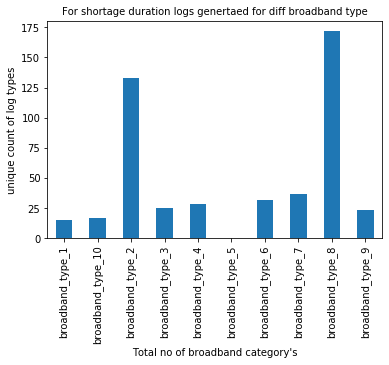

In [652]:
##in broadband_type 5 there are no logs generated for short outage duration
g=train_bivar_dur_1.groupby('broadband_type').log_report_type.nunique().plot.bar()
g.set_title("For shortage duration logs genertaed for diff broadband type", fontsize=10)
g.set_xlabel("Total no of broadband category's", fontsize=10)
g.set_ylabel("unique count of log types", fontsize=10)

In [653]:
##logs generaed for each broadband for long outage 
##ets see the below plot
train_bivar_dur_2.groupby('broadband_type').log_report_type.nunique()

broadband_type
broadband_type_1      23
broadband_type_10     14
broadband_type_2      68
broadband_type_3      14
broadband_type_4      28
broadband_type_5      14
broadband_type_6      29
broadband_type_7      26
broadband_type_8     109
broadband_type_9      19
Name: log_report_type, dtype: int64

Text(0, 0.5, 'unique count of log types')

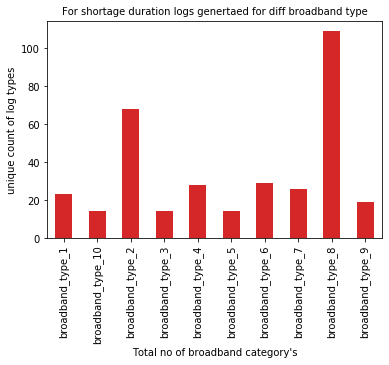

In [654]:
##in broadband_type 5 there are no logs generated for short outage duration
g=train_bivar_dur_2.groupby('broadband_type').log_report_type.nunique().plot.bar(color="#d62728")
g.set_title("For shortage duration logs genertaed for diff broadband type", fontsize=10)
g.set_xlabel("Total no of broadband category's", fontsize=10)
g.set_ylabel("unique count of log types", fontsize=10)

### FIndings from the above plots
<li>In every outage most logs are present in Broadbandtype 2,8</li>
<li>There are very very less logs for Broadband type 5</li>

In [655]:
train_bivar_dur_0.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10)
##Top 10 areas  where logs are generating from which broadbandtype for outage 0

log_report_type      broadband_type    area_code
log_report_type_313  broadband_type_2  area_126     56
log_report_type_315  broadband_type_2  area_126     55
log_report_type_233  broadband_type_2  area_126     55
log_report_type_312  broadband_type_2  area_126     54
log_report_type_232  broadband_type_2  area_126     53
log_report_type_235  broadband_type_2  area_126     52
log_report_type_233  broadband_type_2  area_122     46
log_report_type_313  broadband_type_2  area_124     45
                                       area_122     45
log_report_type_312  broadband_type_2  area_122     45
Name: area_code, dtype: int64

Text(0, 0.5, 'count')

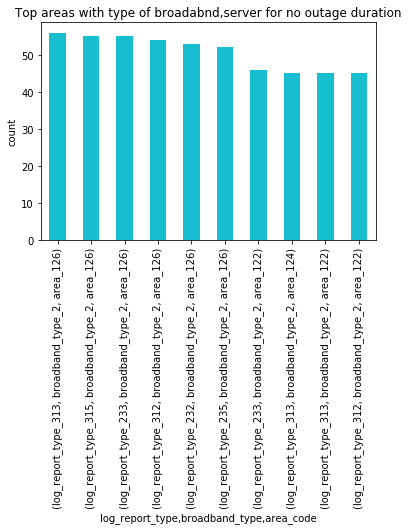

In [656]:
### Observations:
##for outage_duration_0  plotted  the top 10 area_codes with the usage of respective broadband type generated for log report type
train_bivar_dur_0.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10).plot.bar(color="#17becf")
plt.title('Top areas with type of broadabnd,server for no outage duration')
plt.ylabel('count')

In [657]:
train_bivar_dur_1.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10)
##Top 10 areas  where logs are generating from which broadbandtype for outage 1

log_report_type      broadband_type    area_code
log_report_type_82   broadband_type_8  area_1052    20
log_report_type_203  broadband_type_8  area_1052    19
log_report_type_82   broadband_type_8  area_821     17
                                       area_798     16
                                       area_1008    16
log_report_type_203  broadband_type_8  area_798     16
log_report_type_82   broadband_type_8  area_704     15
                                       area_653     15
                                       area_1107    15
log_report_type_71   broadband_type_8  area_821     14
Name: area_code, dtype: int64

Text(0, 0.5, 'count')

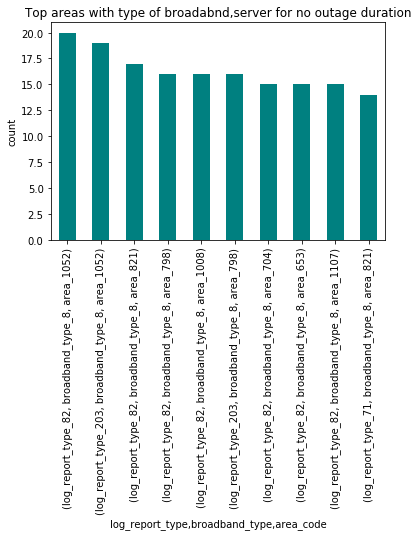

In [658]:
### Observations:
##for outage_duration_0=1  plotted  the top 10 area_codes with the usage of respective broadband type generated for log report type
train_bivar_dur_1.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10).plot.bar(color="teal")
plt.title('Top areas with type of broadabnd,server for no outage duration')
plt.ylabel('count')

In [659]:
train_bivar_dur_2.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10)
##Top 10 areas  where logs are generating from which broadbandtype for outage 2

log_report_type      broadband_type    area_code
log_report_type_203  broadband_type_8  area_600     27
log_report_type_82   broadband_type_8  area_600     27
log_report_type_203  broadband_type_8  area_1100    27
log_report_type_82   broadband_type_8  area_1100    27
                                       area_1107    25
log_report_type_71   broadband_type_8  area_1107    24
log_report_type_203  broadband_type_8  area_1107    23
log_report_type_82   broadband_type_8  area_734     23
                                       area_821     22
log_report_type_203  broadband_type_8  area_821     22
Name: area_code, dtype: int64

Text(0, 0.5, 'count')

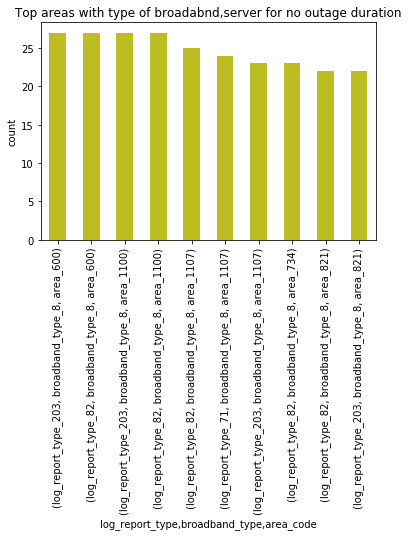

In [660]:
### Observations:
##for outage_duration_2  plotted  the top 10 area_codes with the usage of respective broadband type generated for log report type
train_bivar_dur_2.groupby(['log_report_type','broadband_type']).area_code.value_counts().sort_values(ascending=False).head(10).plot.bar(color='tab:olive')
plt.title('Top areas with type of broadabnd,server for no outage duration')
plt.ylabel('count')

In [661]:
##lets see how braodbandtypes and outage types are related
df_bdo=pd.merge(train_brd,outage_data,on="id",how="left")
df_bdo.head()

,id,area_code,outage_duration,broadband_type,outage_type
0,13366,area_415,1,broadband_type_2,outage_type_4
1,6783,area_474,0,broadband_type_2,outage_type_2
2,9519,area_931,1,broadband_type_8,outage_type_2
3,10202,area_700,1,broadband_type_8,outage_type_1
4,4555,area_600,2,broadband_type_8,outage_type_2


Text(0.5, 1.0, 'Outage types occuring in which broadabnd types')

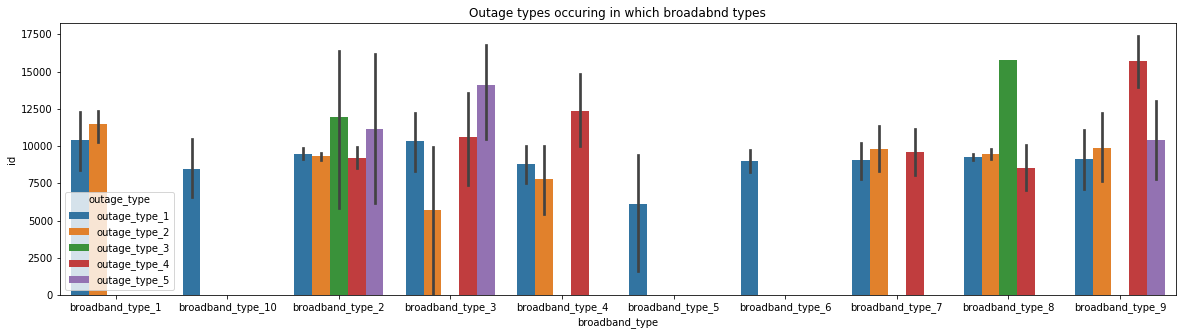

In [662]:
plt.figure(figsize=(20,5))
sns.barplot(x='broadband_type', y='id', hue='outage_type', data=df_bdo)
plt.title('Outage types occuring in which broadabnd types')

### Observations
<ul>
    <li>Outages type 1 are occuring are occuring in every broadband type</li>
    <li>Most of the outages are occuring in broadband type 2,8 </li>
    <li>outage type 1 was occuring only in braodband_types 10,5,6</li>
    <li>Most of the incidents are occured from those who are using braodband type 8,2 </li>
</ul>


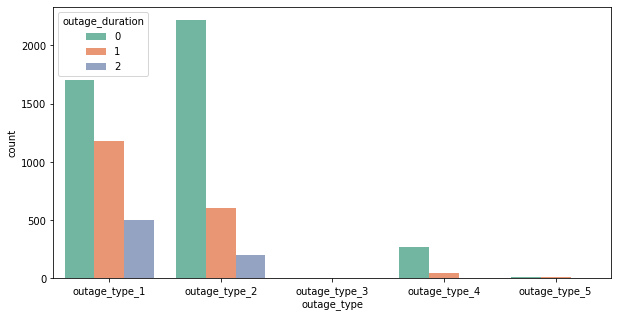

In [663]:
##Most of the outage duration is occuring due to outage types 1 and 2 
plt.figure(figsize=(10,5))


sns.countplot('outage_type',data=df_bdo,  hue='outage_duration',palette="Set2") # a countplot based on the outage_type column

### Observations
1. for outage_type 3,4,5 there is a very less  outage happening 
2. for  outage_type 1,2 there is more outage happening

In [664]:
##lets merge report data,broadbnad data and train
df_bdr=pd.merge(df_bdo,report_data,on="id",how="left")

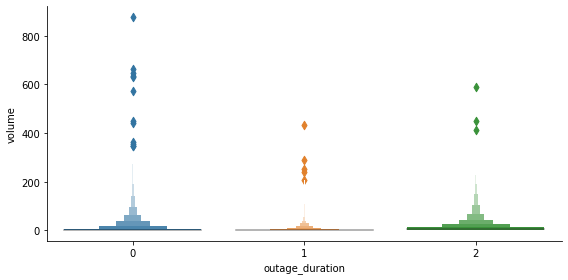

In [712]:
# volume vs outage_duration
sns.catplot(y = "volume", x = "outage_duration", data = df_bdr.sort_values("volume", ascending = False), kind="boxen", height = 4, aspect = 2)
plt.show()

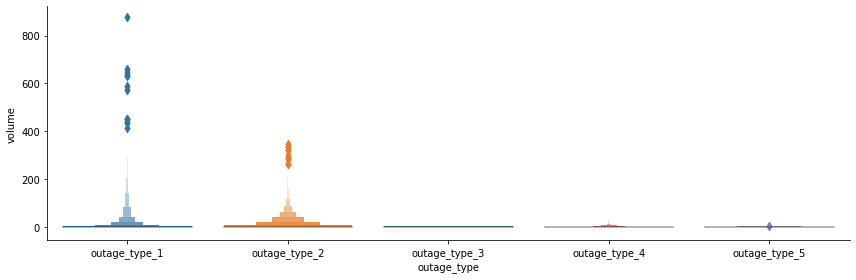

In [666]:
# outage_type vs volume
sns.catplot(y = "volume", x = "outage_type", data = df_bdr.sort_values("volume", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()
##in outage_type 3 there is no volume
##in outage type 4,5 there is very very less volume

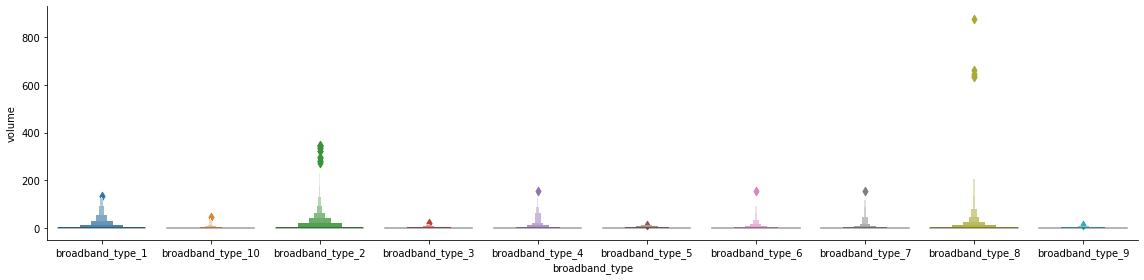

In [667]:
# volume vs broadbnad_type
sns.catplot(y = "volume", x = "broadband_type", data = df_bdr.sort_values("volume", ascending = False), kind="boxen", height = 4, aspect = 4)
plt.show()

##in broadband_type 8 volume reached peak for some of the compliants

### EDA QUESTIONS

In [669]:
##for answeing this question we need only train data. when we merge with other data we will get duplicate area code for same id
long_outage=train_data[train_data['outage_duration']==2]

In [710]:
px.pie(data_frame = long_outage ,names = long_outage.area_code.value_counts().head(5).index,values =long_outage.area_code.value_counts().values[0:5],
      title = "Top 5 Areas codes causing long duartion ",hole = 0.2)

##this plot will not load sometimes

#### Which areas are most prone to long outage durations?
1. area_1100 consists of 28 long duartion of outage
2. area_1107 consists of 27 long duartion of outage and using broadband type 8
3. area_600 consists of 27 long duartion of outage and using broadband type 8
4. area_821 consists of 24 long duartion of outage
5. area_734 consists of 23 long duartion of outage

In [671]:
##for this we are merging both train data nad broadband data based on id
brd_long=pd.merge(train_data,broadband_data, on='id',how='left')
outage_dur_2=brd_long[brd_long['outage_duration']==2]
outage_dur_2['broadband_type'].value_counts().head()

broadband_type_8    544
broadband_type_2     82
broadband_type_6     26
broadband_type_4     17
broadband_type_1     10
Name: broadband_type, dtype: int64

In [711]:
px.pie(data_frame = outage_dur_2 ,names = outage_dur_2.broadband_type.value_counts().head(3).index,values = outage_dur_2.broadband_type.value_counts().values[0:3],
      title = "Top 3 Broadaband types causing long duration ",hole = 0.2)

##this plot will not load sometimes

#### Which broadband types are most prone to long outage durations?
 Broadband type 8(544),2(82)   are suspect of long outage durations

## Findings from the  EDA


#### Main Reasons For Occuring Long Duration of Outage

<ul>
<li>Long Duration was mostly happening who are using Broadband 8 (544)</li>
<li>Reason for only in Broadband 8 was it is the type "ADSL1" which is not a flexible and powerful broadband type and it needs Telephone connection to connect.</li>
<li>Most of the long duration outage was belongs to Outage type1 </li>
<li>In Areas like 600,798 are the top two areas suffering from long duartion outage belongs to outage type 2 and log reports are 82,203 and server type 15</li>
<li>In Areas like 1107,1100,794 are the top areas suffering from long duartion outage belongs to outage type 1 and log reports 82,203,71 and server types 11,15 </li>
</ul>

### Any other recommendations to improve the detection of outage durations?

1. To reduce the long duration of Outage company need to work more on fixing the issues in  broadband types 8,2 because they are causing more outage duartion.
<li>Most of the outages are belongs to type 1 and 2.Company need to fix these types</li>
<li>Need to increase the Servers for above mentioned areas which are facing outage duration more</li>
3. So, we have to take care of those types of broadbands are suitable for the respective areas or not,if not replace with types 3,9,4 broadband which has less outage duration occuring. Otherwise they loose the customers of that areas.
<li> Volume for the short outages was very low compared to other outge duartions</li>
</hr>

</hr>

### Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [674]:
broadband_data["broadband_type"].value_counts()

broadband_type_8     10268
broadband_type_2      8918
broadband_type_6       582
broadband_type_7       498
broadband_type_4       330
broadband_type_9       190
broadband_type_3       145
broadband_type_10       73
broadband_type_1        58
broadband_type_5        14
Name: broadband_type, dtype: int64

In [675]:
# As broadbnad type is Nominal Categorical data we will perform OneHotEncoding
Broadbands = broadband_data[["broadband_type"]]
broadband_dummies= pd.get_dummies(Broadbands,prefix='', prefix_sep='',drop_first= True)
broadband_data=pd.concat([broadband_data,broadband_dummies],axis=1)
broadband_data.drop("broadband_type",axis=1,inplace=True)
broadband_data.shape
broadband_data.head()

,id,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9
0,6597,0,0,0,0,0,0,0,1,0
1,8011,0,0,0,0,0,0,0,1,0
2,2597,0,0,0,0,0,0,0,1,0
3,5022,0,0,0,0,0,0,0,1,0
4,6852,0,0,0,0,0,0,0,1,0


In [676]:
outage_data["outage_type"].value_counts()

outage_type_2    8737
outage_type_1    8728
outage_type_4    1014
outage_type_5      65
outage_type_3       8
Name: outage_type, dtype: int64

In [677]:
# As outage type is Nominal Categorical data we will perform OneHotEncoding

outagetypes = outage_data[["outage_type"]]
outage_dummies= pd.get_dummies(outagetypes,prefix='', prefix_sep='',drop_first= True)
outage_data=pd.concat([outage_data,outage_dummies],axis=1)
outage_data.drop("outage_type",axis=1,inplace=True)
outage_data.shape
outage_data.head()

,id,outage_type_2,outage_type_3,outage_type_4,outage_type_5
0,6597,1,0,0,0
1,8011,1,0,0,0
2,2597,1,0,0,0
3,5022,0,0,0,0
4,6852,0,0,0,0


In [678]:
len(report_data["log_report_type"].value_counts())
##there are 386 unique categories are present so this is a high cardinal feature 
##doing dummies will increase the feature space and lead to curse of dimensionality
##for now iam doing dummies and as one of the method

386

In [679]:
# As log_report_type is Nominal Categorical data we will perform OneHotEncoding

logtypes = report_data[["log_report_type"]]
log_dummies= pd.get_dummies(logtypes, prefix='', prefix_sep='',drop_first= True)
report_data=pd.concat([report_data,log_dummies],axis=1)
report_data.drop("log_report_type",axis=1,inplace=True)
report_data.shape
report_data.head()

,id,volume,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,log_report_type_108,log_report_type_109,log_report_type_11,log_report_type_110,log_report_type_111,log_report_type_112,log_report_type_113,log_report_type_114,log_report_type_115,log_report_type_116,log_report_type_117,log_report_type_118,log_report_type_119,log_report_type_12,log_report_type_120,log_report_type_121,log_report_type_122,log_report_type_123,log_report_type_124,log_report_type_125,log_report_type_126,log_report_type_127,log_report_type_128,log_report_type_129,log_report_type_13,log_report_type_130,log_report_type_131,log_report_type_132,log_report_type_133,log_report_type_134,log_report_type_135,log_report_type_136,log_report_type_137,log_report_type_138,log_report_type_139,log_report_type_14,log_report_type_140,log_report_type_141,log_report_type_142,log_report_type_143,log_report_type_144,log_report_type_145,log_report_type_146,log_report_type_147,log_report_type_148,log_report_type_149,log_report_type_15,log_report_type_150,log_report_type_151,log_report_type_152,log_report_type_153,log_report_type_154,log_report_type_155,log_report_type_156,log_report_type_157,log_report_type_158,log_report_type_159,log_report_type_16,log_report_type_160,log_report_type_161,log_report_type_162,log_report_type_163,log_report_type_164,log_report_type_165,log_report_type_166,log_report_type_167,log_report_type_168,log_report_type_169,log_report_type_17,log_report_type_170,log_report_type_171,log_report_type_172,log_report_type_173,log_report_type_174,log_report_type_175,log_report_type_176,log_report_type_177,log_report_type_178,log_report_type_179,log_report_type_18,log_report_type_180,log_report_type_181,log_report_type_182,log_report_type_183,log_report_type_184,log_report_type_185,log_report_type_186,log_report_type_187,log_report_type_188,log_report_type_189,log_report_type_19,log_report_type_190,log_report_type_191,log_report_type_192,log_report_type_193,log_report_type_194,log_report_type_195,log_report_type_196,log_report_type_197,log_report_type_198,log_report_type_199,log_report_type_2,log_report_type_20,log_report_type_200,log_report_type_201,log_report_type_202,log_report_type_203,log_report_type_204,log_report_type_205,log_report_type_206,log_report_type_207,log_report_type_208,log_report_type_209,log_report_type_21,log_report_type_210,log_report_type_211,log_report_type_212,log_report_type_213,log_report_type_214,log_report_type_215,log_report_type_216,log_report_type_217,log_report_type_218,log_report_type_219,log_report_type_22,log_report_type_220,log_report_type_221,log_report_type_222,log_report_type_223,log_report_type_224,log_report_type_225,log_report_type_226,log_report_type_227,log_report_type_228,log_report_type_229,log_report_type_23,log_report_type_230,log_report_type_231,log_report_type_232,log_report_type_233,log_report_type_234,log_report_type_235,log_report_type_236,log_report_type_237,log_report_type_238,log_report_type_239,log_report_type_24,log_report_type_240,log_report_type_241,log_report_type_242,log_report_type_243,log_report_type_244,log_report_type_245,log_report_type_246,log_report_type_247,log_report_type_248,log_report_type_249,log_report_type_25,log_report_type_250,log_report_type_251,log_report_type_252,log_report_type_253,log_report_type_254,log_report_type_255,log_report_type_256,log_report_type_257,log_report_type_258,log_report_type_259,log_report_type_26,log_report_type_260,log_report_type_261,log_report_type_262,log_report_type_263,log_report_type_264,log_report_type_265,log_report_type_266,log_report_type_267,log_report_type_268,log_report_type_269,log_report_type_27,log_report_type_270,log_report_type_271,log_report_type_272,log_report_type_273,log_report_type_274,log_report_type_275,log_report_type_276,log_report_type_277,log_report_type_278,log_report_type_279,log_report_type_28,log_report

In [680]:
len(server_data["transit_server_type"].value_counts())
##there are 386 unique categories are present so this is a high cardinal feature 
##doing dummies will increase the feature space and lead to curse of dimensionality
##for now iam doing dummies and as one of the method

53

In [681]:
# As log_report_type is Nominal Categorical data we will perform OneHotEncoding

servtypes = server_data[["transit_server_type"]]
serv_dummies= pd.get_dummies(servtypes, prefix='', prefix_sep='',drop_first= True)
server_data=pd.concat([server_data,serv_dummies],axis=1)
server_data.drop("transit_server_type",axis=1,inplace=True)
server_data.shape
server_data.head()

,id,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,transit_server_type_2,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_24,transit_server_type_25,transit_server_type_26,transit_server_type_27,transit_server_type_28,transit_server_type_29,transit_server_type_3,transit_server_type_30,transit_server_type_31,transit_server_type_32,transit_server_type_33,transit_server_type_34,transit_server_type_35,transit_server_type_36,transit_server_type_37,transit_server_type_38,transit_server_type_39,transit_server_type_4,transit_server_type_40,transit_server_type_41,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
0,6597,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8011,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2597,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5022,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5022,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [682]:
##lets make adata frame by merging the above data and train data group by id because there are similar incidents occuring in the same area 
## whenever it was happening comapny ws amentioned it as a same incdent id so iam gropuing all the data
df1=broadband_data.groupby('id').sum()
df1.shape
df1.head()

,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9
id,,,,,,,,,
1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0


In [683]:
df2=outage_data.groupby('id').sum()
df2.shape
df2.head()

,outage_type_2,outage_type_3,outage_type_4,outage_type_5
id,,,,
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,0,1,0
5,1,0,0,0


In [684]:
df3=report_data.groupby('id').sum()
df3.shape
df3.head()

,volume,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,log_report_type_108,log_report_type_109,log_report_type_11,log_report_type_110,log_report_type_111,log_report_type_112,log_report_type_113,log_report_type_114,log_report_type_115,log_report_type_116,log_report_type_117,log_report_type_118,log_report_type_119,log_report_type_12,log_report_type_120,log_report_type_121,log_report_type_122,log_report_type_123,log_report_type_124,log_report_type_125,log_report_type_126,log_report_type_127,log_report_type_128,log_report_type_129,log_report_type_13,log_report_type_130,log_report_type_131,log_report_type_132,log_report_type_133,log_report_type_134,log_report_type_135,log_report_type_136,log_report_type_137,log_report_type_138,log_report_type_139,log_report_type_14,log_report_type_140,log_report_type_141,log_report_type_142,log_report_type_143,log_report_type_144,log_report_type_145,log_report_type_146,log_report_type_147,log_report_type_148,log_report_type_149,log_report_type_15,log_report_type_150,log_report_type_151,log_report_type_152,log_report_type_153,log_report_type_154,log_report_type_155,log_report_type_156,log_report_type_157,log_report_type_158,log_report_type_159,log_report_type_16,log_report_type_160,log_report_type_161,log_report_type_162,log_report_type_163,log_report_type_164,log_report_type_165,log_report_type_166,log_report_type_167,log_report_type_168,log_report_type_169,log_report_type_17,log_report_type_170,log_report_type_171,log_report_type_172,log_report_type_173,log_report_type_174,log_report_type_175,log_report_type_176,log_report_type_177,log_report_type_178,log_report_type_179,log_report_type_18,log_report_type_180,log_report_type_181,log_report_type_182,log_report_type_183,log_report_type_184,log_report_type_185,log_report_type_186,log_report_type_187,log_report_type_188,log_report_type_189,log_report_type_19,log_report_type_190,log_report_type_191,log_report_type_192,log_report_type_193,log_report_type_194,log_report_type_195,log_report_type_196,log_report_type_197,log_report_type_198,log_report_type_199,log_report_type_2,log_report_type_20,log_report_type_200,log_report_type_201,log_report_type_202,log_report_type_203,log_report_type_204,log_report_type_205,log_report_type_206,log_report_type_207,log_report_type_208,log_report_type_209,log_report_type_21,log_report_type_210,log_report_type_211,log_report_type_212,log_report_type_213,log_report_type_214,log_report_type_215,log_report_type_216,log_report_type_217,log_report_type_218,log_report_type_219,log_report_type_22,log_report_type_220,log_report_type_221,log_report_type_222,log_report_type_223,log_report_type_224,log_report_type_225,log_report_type_226,log_report_type_227,log_report_type_228,log_report_type_229,log_report_type_23,log_report_type_230,log_report_type_231,log_report_type_232,log_report_type_233,log_report_type_234,log_report_type_235,log_report_type_236,log_report_type_237,log_report_type_238,log_report_type_239,log_report_type_24,log_report_type_240,log_report_type_241,log_report_type_242,log_report_type_243,log_report_type_244,log_report_type_245,log_report_type_246,log_report_type_247,log_report_type_248,log_report_type_249,log_report_type_25,log_report_type_250,log_report_type_251,log_report_type_252,log_report_type_253,log_report_type_254,log_report_type_255,log_report_type_256,log_report_type_257,log_report_type_258,log_report_type_259,log_report_type_26,log_report_type_260,log_report_type_261,log_report_type_262,log_report_type_263,log_report_type_264,log_report_type_265,log_report_type_266,log_report_type_267,log_report_type_268,log_report_type_269,log_report_type_27,log_report_type_270,log_report_type_271,log_report_type_272,log_report_type_273,log_report_type_274,log_report_type_275,log_report_type_276,log_report_type_277,log_report_type_278,log_report_type_279,log_report_type_28,log_report_ty

In [685]:
df4=server_data.groupby('id').sum()
df4.shape
df4.head()

,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,transit_server_type_2,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_24,transit_server_type_25,transit_server_type_26,transit_server_type_27,transit_server_type_28,transit_server_type_29,transit_server_type_3,transit_server_type_30,transit_server_type_31,transit_server_type_32,transit_server_type_33,transit_server_type_34,transit_server_type_35,transit_server_type_36,transit_server_type_37,transit_server_type_38,transit_server_type_39,transit_server_type_4,transit_server_type_40,transit_server_type_41,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [686]:
###merging the data with train to get the final data frame
##here iam doing left outer join because iam giving train a left and  ids matching with the train fetch the records

### Merging the data frames
merge_data1=pd.merge(train_data,df1, on='id',how='left')
merge_data1.head()
merge_data1.shape

(5904, 12)

In [687]:
### Merging the data frames
merge_data2=pd.merge(merge_data1,df2, on='id',how='left')
merge_data2.head()
merge_data2.shape

(5904, 16)

In [688]:
### Merging the data frames
merge_data3=pd.merge(merge_data2,df3, on='id',how='left')
merge_data3.head()
merge_data3.shape

(5904, 402)

In [689]:
### Merging the data frame
final_data=pd.merge(merge_data3,df4, on='id',how='left')
final_data.shape

(5904, 454)

In [690]:
final_data.head()

,id,area_code,outage_duration,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,outage_type_2,outage_type_3,outage_type_4,outage_type_5,volume,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,log_report_type_108,log_report_type_109,log_report_type_11,log_report_type_110,log_report_type_111,log_report_type_112,log_report_type_113,log_report_type_114,log_report_type_115,log_report_type_116,log_report_type_117,log_report_type_118,log_report_type_119,log_report_type_12,log_report_type_120,log_report_type_121,log_report_type_122,log_report_type_123,log_report_type_124,log_report_type_125,log_report_type_126,log_report_type_127,log_report_type_128,log_report_type_129,log_report_type_13,log_report_type_130,log_report_type_131,log_report_type_132,log_report_type_133,log_report_type_134,log_report_type_135,log_report_type_136,log_report_type_137,log_report_type_138,log_report_type_139,log_report_type_14,log_report_type_140,log_report_type_141,log_report_type_142,log_report_type_143,log_report_type_144,log_report_type_145,log_report_type_146,log_report_type_147,log_report_type_148,log_report_type_149,log_report_type_15,log_report_type_150,log_report_type_151,log_report_type_152,log_report_type_153,log_report_type_154,log_report_type_155,log_report_type_156,log_report_type_157,log_report_type_158,log_report_type_159,log_report_type_16,log_report_type_160,log_report_type_161,log_report_type_162,log_report_type_163,log_report_type_164,log_report_type_165,log_report_type_166,log_report_type_167,log_report_type_168,log_report_type_169,log_report_type_17,log_report_type_170,log_report_type_171,log_report_type_172,log_report_type_173,log_report_type_174,log_report_type_175,log_report_type_176,log_report_type_177,log_report_type_178,log_report_type_179,log_report_type_18,log_report_type_180,log_report_type_181,log_report_type_182,log_report_type_183,log_report_type_184,log_report_type_185,log_report_type_186,log_report_type_187,log_report_type_188,log_report_type_189,log_report_type_19,log_report_type_190,log_report_type_191,log_report_type_192,log_report_type_193,log_report_type_194,log_report_type_195,log_report_type_196,log_report_type_197,log_report_type_198,log_report_type_199,log_report_type_2,log_report_type_20,log_report_type_200,log_report_type_201,log_report_type_202,log_report_type_203,log_report_type_204,log_report_type_205,log_report_type_206,log_report_type_207,log_report_type_208,log_report_type_209,log_report_type_21,log_report_type_210,log_report_type_211,log_report_type_212,log_report_type_213,log_report_type_214,log_report_type_215,log_report_type_216,log_report_type_217,log_report_type_218,log_report_type_219,log_report_type_22,log_report_type_220,log_report_type_221,log_report_type_222,log_report_type_223,log_report_type_224,log_report_type_225,log_report_type_226,log_report_type_227,log_report_type_228,log_report_type_229,log_report_type_23,log_report_type_230,log_report_type_231,log_report_type_232,log_report_type_233,log_report_type_234,log_report_type_235,log_report_type_236,log_report_type_237,log_report_type_238,log_report_type_239,log_report_type_24,log_report_type_240,log_report_type_241,log_report_type_242,log_report_type_243,log_report_type_244,log_report_type_245,log_report_type_246,log_report_type_247,log_report_type_248,log_report_type_249,log_report_type_25,log_report_type_250,log_report_type_251,log_report_type_252,log_report_type_253,log_report_type_254,log_report_type_255,log_report_type_256,log_report_type_257,log_report_type_258,log_report_type_259,log_report_type_26,log_report_type_260,log_report_type_261,log_report_type_262,log_report_type_263,log_report_type_264,log_report_type_265,log_report_type_266,log_report_type_267,log_report_type_268,log_report_type_269,log_report_t

In [691]:
##checking the datat types
final_data.dtypes

id                           int64
area_code                 category
outage_duration           category
broadband_type_10            uint8
broadband_type_2             uint8
                            ...   
transit_server_type_54       uint8
transit_server_type_6        uint8
transit_server_type_7        uint8
transit_server_type_8        uint8
transit_server_type_9        uint8
Length: 454, dtype: object

### MODEL BUILIDNG

### Feature Engineering Method1

I cerated dummies for all the categorical fetaures except area_code due to high cardinality

In [692]:
# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# for tree binarisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


# to build the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import f1_score

  
import warnings
warnings.filterwarnings('ignore')

### Fitting model using Random Forest

1.Split dataset into train and test set in order to prediction w.r.t X_test \
2.If needed do scaling of data \
3.Scaling is not done in Random forest \
4.Import model \
5.Fit the data  \
6.Predict w.r.t X_test  \
7.In classification check F1 Macro  \
8.Plot graph
</li>

In [693]:
### Split the data into X and y
X = final_data.copy().drop(["id","area_code","outage_duration"],axis=1)
y = final_data["outage_duration"]

In [694]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [695]:
X_train.shape , X_test.shape

((4723, 451), (1181, 451))

In [696]:
y_train.value_counts()
## high imbalanced data

0    3071
1    1189
2     463
Name: outage_duration, dtype: int64

In [697]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [698]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier(random_state=10)
reg_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

### Random forest 

In [699]:
pred_rfc_train=reg_rf.predict(X_train) # predict on train data

# Evaluation metrics for train dtaa
print("Results of Random Forest Clasifier  on train data")
print('F1_score for train  :', f1_score(y_train, pred_rfc_train, average='macro'))


Results of Random Forest Clasifier  on train data
F1_score for train  : 0.8739905023173212


In [700]:
pred_rfc_test=reg_rf.predict(X_test) # predict on test data
# Evaluation metrics for train dtaa
print("Results of Random Forest Clasifier  on test data")
print('F1_score for train  :', f1_score(y_test, pred_rfc_test, average='macro'))


Results of Random Forest Clasifier  on test data
F1_score for train  : 0.6179816922360387


### GBM

In [701]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [702]:
train_pred_gb=gb.predict(X_train)
test_pred_gb=gb.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of Gradient Boosting Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_gb, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Gradient Boosting Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_gb, average='macro'))

Results of Gradient Boosting Classifier on train data
F1_score for train  : 0.681946776358099

Results of Gradient Boosting Classifier on test data
F1_score for test  : 0.6351347105200169


### XGB 

In [552]:
xgb_model = xgb.XGBClassifier(random_state=10)
xgb_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob', random_state=10)

In [553]:
train_pred_xgb=xgb_model.predict(X_train)
test_pred_xgb=xgb_model.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of Xtreme Gradient Boosting Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_xgb, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Xtreme Gradient Boosting Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_xgb, average='macro'))

Results of Xtreme Gradient Boosting Classifier on train data
F1_score for train  : 0.6496307185359885

Results of Xtreme Gradient Boosting Classifier on test data
F1_score for test  : 0.6353905378989736


### LGBM 

In [554]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)

lgbm.fit(X_train, y_train)

LGBMClassifier(objective='multiclass', random_state=5)

In [555]:
train_pred_lgb=lgbm.predict(X_train)
test_pred_lgb=lgbm.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of  LIght Gradient Boosting Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_lgb, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of  Light Gradient Boosting Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_lgb, average='macro'))

Results of  LIght Gradient Boosting Classifier on train data
F1_score for train  : 0.7330001920944805

Results of  Light Gradient Boosting Classifier on test data
F1_score for test  : 0.6447277361924506


#### clearly visible that all the  model are  overfitiing  ie.getting low Bias  and high Variance 
#### Due to large dimensional space model is getting overfitting and by using feature  selection techinique  and regularisation techniqies  lilke Lasso and ridge and reduce the dimensions

### Feature Selection


In [352]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier(random_state=12)
selection.fit(X, y)

ExtraTreesClassifier()

In [353]:
print(selection.feature_importances_)


[1.07831425e-03 1.53150582e-02 1.18865663e-03 4.29881335e-03
 3.39554531e-04 5.32427203e-03 2.04265240e-03 8.21101653e-03
 1.61065492e-03 1.25606844e-02 5.82591764e-05 4.44285367e-03
 3.48390104e-04 1.05287420e-02 6.88077935e-05 5.42081047e-03
 3.63098099e-04 3.48912837e-01 3.06195604e-04 0.00000000e+00
 3.04510604e-04 0.00000000e+00 8.65630897e-04 8.83823301e-05
 1.01924189e-03 2.62050467e-04 7.66170349e-06 6.22913533e-04
 3.77927897e-04 1.73828894e-05 8.66910352e-05 5.46226390e-04
 3.95387497e-04 4.53670480e-05 6.11311585e-04 3.93037359e-05
 0.00000000e+00 1.71683518e-04 1.17580442e-03 0.00000000e+00
 0.00000000e+00 5.23800586e-04 0.00000000e+00 4.56492179e-05
 4.43536125e-05 8.39842064e-05 6.01566145e-04 0.00000000e+00
 3.22611635e-04 6.31503332e-05 0.00000000e+00 0.00000000e+00
 1.08083195e-06 1.77272936e-06 4.14587219e-04 6.44737438e-04
 3.62018130e-03 1.16341531e-03 7.62240167e-04 5.83685205e-05
 0.00000000e+00 9.75997968e-05 0.00000000e+00 9.55405594e-04
 9.36119096e-04 5.580662

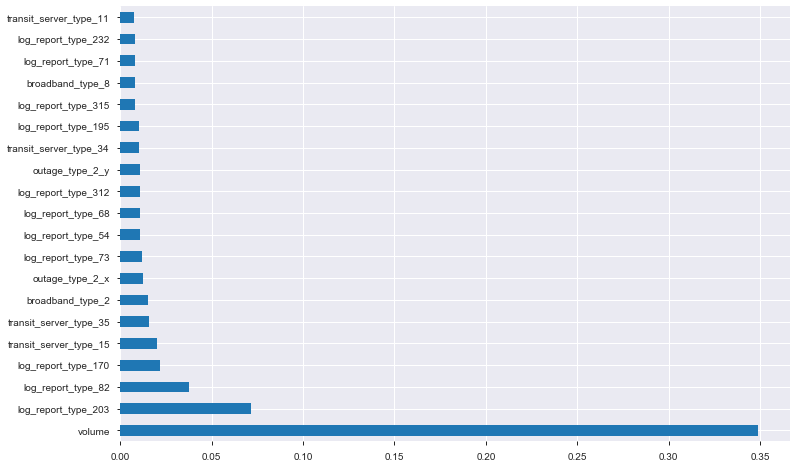

In [358]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [359]:
from sklearn.metrics import f1_score
pred_select_train=selection.predict(X_train) # predict on train data

# Evaluation metrics for train dtaa
print("Results of Random Forest Clasifier  on train data")
print('F1_score for train  :', f1_score(y_train, pred_select_train, average='macro'))

Results of Random Forest Clasifier  on train data
F1_score for train  : 0.8594840044170029


In [360]:
pred_select_test=selection.predict(X_test) # predict on test data
# Evaluation metrics for train data
print("Results of Random Forest Clasifier  on Test data")
print('F1_score for test  :', f1_score(y_test, pred_select_test, average='macro'))

Results of Random Forest Clasifier  on Test data
F1_score for test  : 0.8640367812460692


#### I submitted the csv file with the results but it was showing very low score   I.e it was overfitting 
performance on unseen data was very poor     
To  Do- improve the performance of the model by handling ctaegorical fetaures and imbalanced data   
lets try another method 


### SMOTE

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. Specifically, a random example from the minority class is first chosen.

In [556]:
print("Before Smote")
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

Before Smote


{0: 3071, 1: 1189, 2: 463}

In [558]:
##!pip install imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [559]:
print("After Smote")
##Now the classes are balnced
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

After Smote


{0: 3071, 1: 3071, 2: 3071}

In [380]:
##using xgb classifier and fitting the data
xgb_model.fit(x_train_res,y_train_res)

XGBClassifier(objective='multi:softprob')

In [561]:
train_pred_smote=xgb_model.predict(X_train)
test_pred_smote=xgb_model.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of xtreme Gradient Boosting Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_smote, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Xtreme Gradient Boosting Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_smote, average='macro'))

Results of xtreme Gradient Boosting Classifier on train data
F1_score for train  : 0.6496307185359885

Results of Xtreme Gradient Boosting Classifier on test data
F1_score for test  : 0.6353905378989736


Text(0.5, 15.0, 'Predicted label')

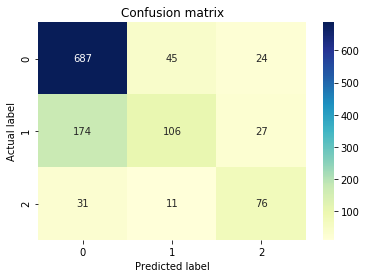

In [562]:
# Creating a Heatmap for the confusion matrix. 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_pred_smote)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

BY using Smote Overfitting is reduced somewhat  and still  need to increase the performance  of the model by delaing with the misclasification samples especially class 1

### Method 2

To avoid the ambiguity i am not merging the data again. I merged the data and stored in the final_org.csv
I used Label Encoding for all the categorical fetaures including volume 

In [563]:
##Iam created Anotther data frame by merging given csv files without creating dummies.I am not again doing here, iwill just import
#the csv file which i already created 
data2=pd.read_csv('final_org.csv')

In [564]:
data2.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,area_415,1,broadband_type_2,outage_type_4,log_report_type_312,1,transit_server_type_35
1,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_35
2,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_34
3,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_35
4,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_233,1,transit_server_type_34


In [565]:
data2.shape #obtained by doing left merge on all csv files

(48973, 8)

In [566]:
##i though there is almost most of the rows are repeating in terms of area_code and ids as common
##i removed all the duplicate rows
final_data2 = data2.drop_duplicates(subset='id', keep="first")
final_data2.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,area_415,1,broadband_type_2,outage_type_4,log_report_type_312,1,transit_server_type_35
1,6783,area_474,0,broadband_type_2,outage_type_2,log_report_type_312,2,transit_server_type_35
13,9519,area_931,1,broadband_type_8,outage_type_2,log_report_type_203,3,transit_server_type_15
16,10202,area_700,1,broadband_type_8,outage_type_1,log_report_type_54,1,transit_server_type_11
17,4555,area_600,2,broadband_type_8,outage_type_2,log_report_type_82,30,transit_server_type_15


In [567]:
final_data2.shape

(5904, 8)

In [568]:
final_data2.dtypes#checking data types

id                      int64
area_code              object
outage_duration         int64
broadband_type         object
outage_type            object
log_report_type        object
volume                  int64
transit_server_type    object
dtype: object

In [569]:
##changing the data types and iam taking volume as categorical feature
final_data2['outage_duration']=final_data2['outage_duration'].astype('category')
final_data2['volume']=final_data2['volume'].astype('category')
final_data2['broadband_type']=final_data2['broadband_type'].astype('category')
final_data2['outage_type']=final_data2['outage_type'].astype('category')
final_data2['log_report_type']=final_data2['log_report_type'].astype('category')
final_data2['transit_server_type']=final_data2['transit_server_type'].astype('category')

In [570]:
### Split the data into X and y
X = final_data2.copy().drop(["id","area_code","outage_duration"],axis=1)
y = final_data2["outage_duration"]

In [571]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [572]:
X_train.shape, X_test.shape

((4723, 5), (1181, 5))

In [573]:
X_train.head()

,broadband_type,outage_type,log_report_type,volume,transit_server_type
14757,broadband_type_8,outage_type_1,log_report_type_66,7,transit_server_type_11
10655,broadband_type_6,outage_type_1,log_report_type_345,4,transit_server_type_13
34009,broadband_type_2,outage_type_1,log_report_type_219,1,transit_server_type_20
8053,broadband_type_8,outage_type_1,log_report_type_87,9,transit_server_type_11
17480,broadband_type_2,outage_type_2,log_report_type_312,13,transit_server_type_35


In [574]:
from sklearn.preprocessing import LabelEncoder

cols = ('broadband_type', 'outage_type', 'log_report_type', 
        'volume', 'transit_server_type')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(X_train[c].values)) 
    X_train[c] = lbl.transform(list(X_train[c].values))
    lbl.fit(list(X_test[c].values)) 
    X_test[c] = lbl.transform(list(X_test[c].values))

In [575]:
X_train.head()
##after label encoding

,broadband_type,outage_type,log_report_type,volume,transit_server_type
14757,7,0,180,6,1
10655,5,0,139,3,3
34009,2,0,79,0,8
8053,7,0,198,8,1
17480,2,1,132,12,21


In [576]:
##afetr label encoding
X_test.head()

,broadband_type,outage_type,log_report_type,volume,transit_server_type
45730,7,0,17,1,1
38835,1,0,83,2,5
20598,8,1,84,0,4
19452,2,3,74,0,19
19364,7,1,34,1,4


### Logistic Regression

In [577]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create linear regression object
log_reg= LogisticRegression(random_state=0)

# Train the model using the training sets
log_reg.fit(X_train, y_train)



LogisticRegression(random_state=0)

In [578]:
train_pred_log=log_reg.predict(X_train)
test_pred_log=log_reg.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of Logistic Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_log, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Xtreme Logistic Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_log, average='macro'))

Results of Logistic Classifier on train data
F1_score for train  : 0.3662404547462648

Results of Xtreme Logistic Classifier Classifier on test data
F1_score for test  : 0.3666899347058603


### XGB 

In [579]:
import xgboost as xgb

xg_reg = xgb.XGBClassifier(random_state=0)
xg_reg.fit(X_train,y_train)



XGBClassifier(objective='multi:softprob')

In [580]:
train_pred_xgbb=xg_reg.predict(X_train)
test_pred_xgbb=xg_reg.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of XGB Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_xgbb, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of XGB  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_xgbb, average='macro'))

Results of XGB Classifier on train data
F1_score for train  : 0.5781273575651548

Results of XGB  Classifier Classifier on test data
F1_score for test  : 0.39045951011380203


### CatBoost

In [581]:
from catboost import CatBoostClassifier
#cat_model = CatBoostClassifier() 

cat_model = CatBoostClassifier()
cat_model.fit(X_train,y_train)

Learning rate set to 0.085646
0:	learn: 1.0446417	total: 185ms	remaining: 3m 4s
1:	learn: 1.0013741	total: 189ms	remaining: 1m 34s
2:	learn: 0.9641624	total: 205ms	remaining: 1m 8s
3:	learn: 0.9334907	total: 219ms	remaining: 54.4s
4:	learn: 0.9073851	total: 239ms	remaining: 47.6s
5:	learn: 0.8841184	total: 245ms	remaining: 40.7s
6:	learn: 0.8626832	total: 252ms	remaining: 35.7s
7:	learn: 0.8424918	total: 258ms	remaining: 32s
8:	learn: 0.8265202	total: 275ms	remaining: 30.2s
9:	learn: 0.8139189	total: 294ms	remaining: 29.1s
10:	learn: 0.8007609	total: 300ms	remaining: 26.9s
11:	learn: 0.7880237	total: 306ms	remaining: 25.2s
12:	learn: 0.7780532	total: 312ms	remaining: 23.7s
13:	learn: 0.7686260	total: 318ms	remaining: 22.4s
14:	learn: 0.7591123	total: 324ms	remaining: 21.3s
15:	learn: 0.7530219	total: 330ms	remaining: 20.3s
16:	learn: 0.7469686	total: 336ms	remaining: 19.4s
17:	learn: 0.7405903	total: 359ms	remaining: 19.6s
18:	learn: 0.7351189	total: 367ms	remaining: 18.9s
19:	learn: 0

In [121]:
train_pred_cat=cat_model.predict(X_train)
test_pred_cat=cat_model.predict(X_test)

# Evaluation metri Cat Boost Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_cat, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Cat Boost  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_cat, average='macro'))

F1_score for train  : 0.6942623804625573

Results of Cat Boost  Classifier Classifier on test data
F1_score for test  : 0.42908582278214963


# Hyperparameter Tuning
Choose following method for hyperparameter tuning \
RandomizedSearchCV --> Fast \
GridSearchCV  \
Assign hyperparameters in form of dictionary  \
Fit the model  \
Check best paramters and best score \

In [132]:
from sklearn.model_selection import RandomizedSearchCV

In [133]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [136]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [148]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
import sklearn
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, scoring=scorer, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [149]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42,
                   scoring=make_scorer(f1_score, average=macro), verbose=2)

In [150]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 15}

In [154]:
train_pred_rfhyp=rf_random.predict(X_train)
test_pred_rfhyp=rf_random.predict(X_test)

# Evaluation metri Cat Boost Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_rfhyp, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Cat Boost  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_rfhyp, average='macro'))

F1_score for train  : 0.6815899553819639

Results of Cat Boost  Classifier Classifier on test data
F1_score for test  : 0.4014643104757


### label encoding are giving very poor results

lets try another method

### Feature Engineering Method 3
I used all the categorical columns as  numeric and scaled the data and fitting into the model

In [161]:
# read the data
outage_data=pd.read_csv('./data/outage_data.csv')

## print shape of dataset with rows and columns
print(outage_data.shape)

##print glimpse of the data
outage_data.head()

(18552, 2)


,id,outage_type
0,6597,outage_type_2
1,8011,outage_type_2
2,2597,outage_type_2
3,5022,outage_type_1
4,6852,outage_type_1


In [162]:
##removing all the text from outage type
outage_data['outage_type']=outage_data['outage_type'].apply(lambda x :int(x[12:]))

In [582]:
## after removing text
outage_data.head()

,id,outage_type_2,outage_type_3,outage_type_4,outage_type_5
0,6597,1,0,0,0
1,8011,1,0,0,0
2,2597,1,0,0,0
3,5022,0,0,0,0
4,6852,0,0,0,0


In [166]:
# read the data
broadband_data=pd.read_csv('./data/broadband_data.csv')

## print shape of dataset with rows and columns
print(broadband_data.shape)

##print glimpse of the data
broadband_data.head()

(21076, 2)


,id,broadband_type
0,6597,broadband_type_8
1,8011,broadband_type_8
2,2597,broadband_type_8
3,5022,broadband_type_8
4,6852,broadband_type_8


In [167]:
##removing all the text from broadbnad type
broadband_data['broadband_type']=broadband_data['broadband_type'].apply(lambda x :int(x[15:]))

In [187]:
## after removng the Text
broadband_data.head()

,id,broadband_type
0,6597,8
1,8011,8
2,2597,8
3,5022,8
4,6852,8


In [584]:
# read the data
report_data=pd.read_csv('./data/report_data.csv')

## print shape of dataset with rows and columns
print(report_data.shape)

##print glimpse of the data
report_data.head()

(58671, 3)


,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [585]:
##removing all the text from report type i.e prefix

report_data['log_report_type']=report_data['log_report_type'].apply(lambda x :int(x[16:]))

In [586]:
## after removing the text
report_data.head()

,id,log_report_type,volume
0,6597,68,6
1,8011,68,7
2,2597,68,1
3,5022,172,2
4,5022,56,1


In [173]:
# read the data
server_data=pd.read_csv('./data/server_data.csv')

## print shape of dataset with rows and columns
print(server_data.shape)

##print glimpse of the data
server_data.head()

(31170, 2)


,id,transit_server_type
0,6597,transit_server_type_11
1,8011,transit_server_type_15
2,2597,transit_server_type_15
3,5022,transit_server_type_15
4,5022,transit_server_type_11


In [174]:
##removing all the text from servere type
server_data['transit_server_type']=server_data['transit_server_type'].apply(lambda x :int(x[20:]))

In [175]:
##print glimpse of the data aftr removal
server_data.head()

,id,transit_server_type
0,6597,11
1,8011,15
2,2597,15
3,5022,15
4,5022,11


In [177]:
# read the data
train_data=pd.read_csv('./data/train_data.csv')

## print shape of dataset with rows and columns
print(train_data.shape)

##print glimpse of the data
train_data.head()

(5904, 3)


,id,area_code,outage_duration
0,13366,area_415,1
1,6783,area_474,0
2,9519,area_931,1
3,10202,area_700,1
4,4555,area_600,2


In [178]:
##removing all the text from area code
train_data['area_code']=train_data['area_code'].apply(lambda x :int(x[5:]))

In [179]:
train_data.head()

,id,area_code,outage_duration
0,13366,415,1
1,6783,474,0
2,9519,931,1
3,10202,700,1
4,4555,600,2


In [188]:
### Merging the data frame
merge_data1=pd.merge(train_data,broadband_data, on='id',how='left')
merge_data1.head()
merge_data1.shape

(6754, 4)

In [189]:
### Merging the data frame
merge_data2=pd.merge(merge_data1,outage_data, on='id', how='left')
merge_data2.head()
merge_data2.shape

(6754, 5)

In [190]:
### Merging the data frame
merge_data3=pd.merge(merge_data2,report_data, on='id', how='left')
merge_data3.head()
merge_data3.shape

(22679, 7)

In [191]:
### Merging the data frame
final_data3=pd.merge(merge_data3,server_data, on='id', how='left')
final_data3.head()
final_data3.shape

(48973, 8)

In [193]:
##after Merging
final_data3.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,415,1,2,4,312,1,35
1,6783,474,0,2,2,312,2,35
2,6783,474,0,2,2,312,2,34
3,6783,474,0,2,2,233,1,35
4,6783,474,0,2,2,233,1,34


In [195]:
##i though there is almost most of the rows are repeating in terms of area_code and ids as common
##i removed all the duplicate rows
final_data_3 =final_data3.drop_duplicates(subset='id', keep="first")
final_data_3.head()

,id,area_code,outage_duration,broadband_type,outage_type,log_report_type,volume,transit_server_type
0,13366,415,1,2,4,312,1,35
1,6783,474,0,2,2,312,2,35
13,9519,931,1,8,2,203,3,15
16,10202,700,1,8,1,54,1,11
17,4555,600,2,8,2,82,30,15


In [196]:
final_data_3.dtypes

id                     int64
area_code              int64
outage_duration        int64
broadband_type         int64
outage_type            int64
log_report_type        int64
volume                 int64
transit_server_type    int64
dtype: object

In [197]:
final_data_3['outage_duration']=final_data_3['outage_duration'].astype('category')

In [198]:
final_data_3.dtypes

id                        int64
area_code                 int64
outage_duration        category
broadband_type            int64
outage_type               int64
log_report_type           int64
volume                    int64
transit_server_type       int64
dtype: object

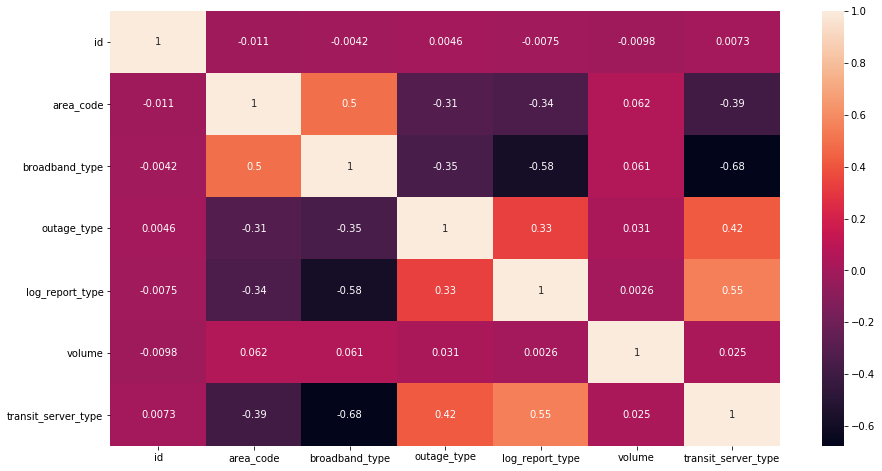

In [260]:
#Get Correlation between different variables
corr = final_data_3.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
## all the feature are needed because there is no much corelation between any features

In [200]:
### Split the data into X and y
X = final_data_3.copy().drop(["id","outage_duration"],axis=1)
y = final_data_3["outage_duration"]

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

In [202]:
##let sacle the dataa
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [203]:
import xgboost as xgb
xg_reg = xgb.XGBClassifier(random_state=10)
xg_reg.fit(X_train,y_train)


XGBClassifier(objective='multi:softprob')

In [204]:
train_pred_xgbb=xg_reg.predict(X_train)
test_pred_xgbb=xg_reg.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of XGB Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_xgbb, average='macro'))
print()

# Evaluation metrics for test dataa
print("Results of XGB  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_xgbb, average='macro'))

Results of XGB Classifier on train data
F1_score for train  : 0.590353286515973

Results of XGB  Classifier Classifier on test data
F1_score for test  : 0.5447075792641336


### OVR
The One-vs-Rest strategy splits a multi-class classification into one binary classification problem per class.


In [207]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model = LogisticRegression(multi_class='ovr')
# fit model
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [208]:
train_pred_ovr=model.predict(X_train)
test_pred_ovr=model.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of XGB Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_ovr, average='macro'))
print()

# Evaluation metrics for test dataa
print("Results of XGB  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_ovr, average='macro'))

Results of XGB Classifier on train data
F1_score for train  : 0.30712453895370034

Results of XGB  Classifier Classifier on test data
F1_score for test  : 0.28883592296475086


### OVO
The One-vs-One strategy splits a multi-class classification into one binary classification problem per each pair of classes.

In [209]:
# SVM for multi-class classification using built-in one-vs-one
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
# define model
model_svc = SVC(decision_function_shape='ovo')
# fit model
model_svc.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [210]:
train_pred_ovo=model_svc.predict(X_train)
test_pred_ovo=model_svc.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of XGB Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_ovo, average='macro'))
print()

# Evaluation metrics for test dataa
print("Results of XGB  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_ovo, average='macro'))

Results of XGB Classifier on train data
F1_score for train  : 0.34529088743386865

Results of XGB  Classifier Classifier on test data
F1_score for test  : 0.3060108649182047


### SVM 

In [218]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC()

In [219]:
train_pred_svc=svclassifier.predict(X_train)
test_pred_svc=svclassifier.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of XGB Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_pred_svc, average='macro'))
print()

# Evaluation metrics for test dataa
print("Results of XGB  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_pred_svc, average='macro'))

Results of XGB Classifier on train data
F1_score for train  : 0.34529088743386865

Results of XGB  Classifier Classifier on test data
F1_score for test  : 0.3060108649182047


#### from the method 3 results are in a insatisfactory   However we used some of the methods like OVO and OVR
NO improvemnet

### Feature Engineering : Method 4

I Used Volume as the Categorical data and creted Dummies <br>
To avoid the Ambiguity of merging again and again I framed the dataset and stored in the more_cols.csv


In [227]:
##data obtained from merging all the csv files making volume as dummies
final_data4=pd.read_csv('more_cols.csv')

In [228]:
## Glimpse of the data
final_data4.head()

,id,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,transit_server_type_1,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,transit_server_type_2,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_24,transit_server_type_25,transit_server_type_26,transit_server_type_27,transit_server_type_28,transit_server_type_29,transit_server_type_3,transit_server_type_30,transit_server_type_31,transit_server_type_32,transit_server_type_33,transit_server_type_34,transit_server_type_35,transit_server_type_36,transit_server_type_37,transit_server_type_38,transit_server_type_39,transit_server_type_4,transit_server_type_40,transit_server_type_41,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9,log_report_type_1,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,log_report_type_108,log_report_type_109,log_report_type_11,log_report_type_110,log_report_type_111,log_report_type_112,log_report_type_113,log_report_type_114,log_report_type_115,log_report_type_116,log_report_type_117,log_report_type_118,log_report_type_119,log_report_type_12,log_report_type_120,log_report_type_121,log_report_type_122,log_report_type_123,log_report_type_124,log_report_type_125,log_report_type_126,log_report_type_127,log_report_type_128,log_report_type_129,log_report_type_13,log_report_type_130,log_report_type_131,log_report_type_132,log_report_type_133,log_report_type_134,log_report_type_135,log_report_type_136,log_report_type_137,log_report_type_138,log_report_type_139,log_report_type_14,log_report_type_140,log_report_type_141,log_report_type_142,log_report_type_143,log_report_type_144,log_report_type_145,log_report_type_146,log_report_type_147,log_report_type_148,log_report_type_149,log_report_type_15,log_report_type_150,log_report_type_151,log_report_type_152,log_report_type_153,log_report_type_154,log_report_type_155,log_report_type_156,log_report_type_157,log_report_type_158,log_report_type_159,log_report_type_16,log_report_type_160,log_report_type_161,log_report_type_162,log_report_type_163,log_report_type_164,log_report_type_165,log_report_type_166,log_report_type_167,log_report_type_168,log_report_type_169,log_report_type_17,log_report_type_170,log_report_type_171,log_report_type_172,log_report_type_173,log_report_type_174,log_report_type_175,log_report_type_176,log_report_type_177,log_report_type_178,log_report_type_179,log_report_type_18,log_report_type_180,log_report_type_181,log_report_type_182,log_report_type_183,log_report_type_184,log_report_type_185,log_report_type_186,log_report_type_187,log_report_type_188,log_report_type_189,log_report_type_19,log_report_type_190,log_report_type_191,log_report_type_192,log_report_type_193,log_report_type_194,log_report_type_195,log_report_type_196,log_report_type_197,log_report_type_198,log_report_type_199,log_report_type_2,log_report_type_20,log_report_type_200,log_report_type_201,log_report_type_202,log_report_type_203,log_report_type_204,log_report_type_205,log_report_type_206,log_report_type_207,log_report_type_208,log_report_type_209,log_report_type_21,log_report_type_210,log_report_type_211,log_report_type_212,log_report_type_213,l

In [231]:
##checking the structure 
final_data4.shape

(5904, 798)

In [292]:
## chekcing the data types
final_data4.dtypes

id                 int64
outage_type_1      int64
outage_type_2      int64
outage_type_3      int64
outage_type_4      int64
                   ...  
volume_814         int64
volume_877         int64
volume_1310        int64
area_code          int64
outage_duration    int64
Length: 798, dtype: object

In [318]:
### Split the data into X and y
X = final_data4.copy().drop(["id","outage_duration","area_code"],axis=1)
y = final_data4["outage_duration"]

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [426]:
X_train.shape,X_test.shape

((4723, 795), (1181, 795))

### Logistic Regression

In [429]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
y_pred_train = logistic.predict(X_train)
y_pred_test = logistic.predict(X_test)

# Evaluation metrics for train dtaa
print("Results of Logistic regression on train data")
print('F1_score for train       :', f1_score(y_train, y_pred_train, average='macro'))

print()

# Evaluation metrics for test dtaa
print("Results of Logistic regression on test data")
print('F1_score for train       :', f1_score(y_test, y_pred_test, average='macro'))


Results of Logistic regression on train data
F1_score for train       : 0.7160250874796659

Results of Logistic regression on test data
F1_score for train       : 0.6178154214590816


### Random Forest 

In [322]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier(random_state=10)
reg_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [432]:
train_preds_rf=reg_rf.predict(X_train)
test_preds_rf=reg_rf.predict(X_test)

print("Results of random Forest Classifier Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_rf, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of Random forest  Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_preds_rf, average='macro'))

Results of random Forest Classifier Classifier on train data
F1_score for train  : 0.9205141880102296

Results of Random forest  Classifier Classifier on test data
F1_score for test  : 0.6350857567607391


### Gradient Boosting

In [324]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=10)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=500)

In [431]:
train_preds_gb=classifier.predict(X_train)
test_preds_gb=classifier.predict(X_test)

# Evaluation metri GB Classifier  on train data")
print("Results of GB Classifier Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_gb, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of GB Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_preds_gb, average='macro'))

Results of GB Classifier Classifier on train data
F1_score for train  : 0.7481896230827032

Results of GB Classifier Classifier on test data
F1_score for test  : 0.6263353932872967


### Ada Boost Classifier

In [339]:
ada_model = AdaBoostClassifier(random_state=10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [433]:
train_preds_ada=ada_model.predict(X_train)
test_preds_ada=ada_model.predict(X_test)

print("Results of ADA Boost Classifier Classifier on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_ada, average='macro'))
print()

# Evaluation metrics for test dtaa
print("Results of ADA Classifier Classifier on test data")
print('F1_score for test  :', f1_score(y_test, test_preds_ada, average='macro'))

Results of ADA Boost Classifier Classifier on train data
F1_score for train  : 0.6330199985373792

Results of ADA Classifier Classifier on test data
F1_score for test  : 0.6101867147690294


### EXtreme Gradient Boosting

In [349]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [434]:
train_preds_xgb=xgb_model.predict(X_train)
test_preds_xgb=xgb_model.predict(X_test)

# Evaluation metri ADA Boost Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_xgb, average='macro'))
print()

# Evaluation metrics for test dtaa
print('F1_score for test  :', f1_score(y_test, test_preds_xgb, average='macro'))

F1_score for train  : 0.6610702271338934

F1_score for test  : 0.6152483577468123


### Catboost Classifeir

In [351]:
from catboost import CatBoostClassifier
#cat_model = CatBoostClassifier() 
cat_model = CatBoostClassifier()
cat_model.fit(X_train,y_train)

Learning rate set to 0.085646
0:	learn: 1.0370149	total: 17.4ms	remaining: 17.4s
1:	learn: 0.9916557	total: 41ms	remaining: 20.5s
2:	learn: 0.9491857	total: 57.6ms	remaining: 19.1s
3:	learn: 0.9193953	total: 76.7ms	remaining: 19.1s
4:	learn: 0.8902080	total: 101ms	remaining: 20.1s
5:	learn: 0.8640415	total: 116ms	remaining: 19.2s
6:	learn: 0.8418874	total: 132ms	remaining: 18.7s
7:	learn: 0.8220904	total: 148ms	remaining: 18.4s
8:	learn: 0.8059703	total: 165ms	remaining: 18.2s
9:	learn: 0.7899005	total: 185ms	remaining: 18.3s
10:	learn: 0.7766039	total: 201ms	remaining: 18.1s
11:	learn: 0.7641143	total: 217ms	remaining: 17.8s
12:	learn: 0.7527886	total: 233ms	remaining: 17.7s
13:	learn: 0.7412382	total: 248ms	remaining: 17.5s
14:	learn: 0.7305851	total: 265ms	remaining: 17.4s
15:	learn: 0.7218419	total: 283ms	remaining: 17.4s
16:	learn: 0.7169791	total: 299ms	remaining: 17.3s
17:	learn: 0.7077574	total: 318ms	remaining: 17.4s
18:	learn: 0.7016191	total: 336ms	remaining: 17.4s
19:	learn

In [435]:
train_preds_cat=cat_model.predict(X_train)
test_preds_cat=cat_model.predict(X_test)

# Evaluation metri ADA Boost Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_cat, average='macro'))
print()

# Evaluation metrics for test dtaa
print('F1_score for test  :', f1_score(y_test, test_preds_cat, average='macro'))

F1_score for train  : 0.7882266683831309

F1_score for test  : 0.6479590362875611


### Light Gradient Boosting

In [353]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(objective='multiclass', random_state=5)

lgbm.fit(X_train, y_train)

LGBMClassifier(objective='multiclass', random_state=5)

In [436]:
train_preds_lgbm=lgbm.predict(X_train)
test_preds_lgbm=lgbm.predict(X_test)

# Evaluation metri LGBM Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_lgbm, average='macro'))
print()

# Evaluation metrics for test dtaa
print('F1_score for test  :', f1_score(y_test, test_preds_lgbm, average='macro'))

F1_score for train  : 0.7783213689385486

F1_score for test  : 0.6432027128290135


### Stacking Classifier

In [370]:
from mlxtend.classifier import StackingClassifier
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
warnings.simplefilter('ignore')
from sklearn import model_selection
clf1 = RandomForestClassifier(random_state=1)
clf2=  xgb.XGBClassifier()
lr =  LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2], 
                          use_probas=True,
                          meta_classifier=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train,y_train, 
                                              cv=3, scoring='f1_macro')
    print("f1 score: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

f1 score: 0.64 (+/- 0.01) [KNN]
f1 score: 0.62 (+/- 0.02) [Random Forest]
f1 score: 0.64 (+/- 0.01) [Naive Bayes]


In [372]:
sclf.fit(X_train,y_train)

StackingClassifier(classifiers=[RandomForestClassifier(random_state=1),
                                XGBClassifier()],
                   meta_classifier=LogisticRegression(), use_probas=True)

In [437]:
train_preds_sclf=sclf.predict(X_train)
test_preds_sclf=sclf.predict(X_test)

# Evaluation metri Stacking  Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_sclf, average='macro'))
print()

# Evaluation metrics for test dtaa
print('F1_score for test  :', f1_score(y_test, test_preds_sclf, average='macro'))

F1_score for train  : 0.9217246860866259

F1_score for test  : 0.6276132684076675


### Voting Classifier

In [374]:
clf1 = RandomForestClassifier(random_state=1)
clf2=  xgb.XGBClassifier()
clf3 = LogisticRegression()

print('5-fold cross validation:\n')

labels = ['RF', 'XGB', 'LR']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.74 (+/- 0.01) [RF]
Accuracy: 0.74 (+/- 0.01) [XGB]
Accuracy: 0.74 (+/- 0.01) [LR]


In [379]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                                  voting = 'hard')

In [380]:
voting_clf_soft = VotingClassifier(estimators = [(labels[0], clf1),
                                                 (labels[1], clf2),
                                                 (labels[2], clf3)],
                                                  voting = 'soft')

In [381]:
labels_new = ['RF', 'XGB', 'LR',
              'Voting_Classifier_Hard', 'Voting_Classifier_Soft']

for (clf, label) in zip([clf1, clf2, clf3, voting_clf_hard,
                        voting_clf_soft], labels_new):
    scores = model_selection.cross_val_score(clf, X, y, cv=5,
            scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

Accuracy: 0.74 (+/- 0.01) [RF]
Accuracy: 0.74 (+/- 0.01) [XGB]
Accuracy: 0.74 (+/- 0.01) [LR]
Accuracy: 0.74 (+/- 0.01) [Voting_Classifier_Hard]
Accuracy: 0.75 (+/- 0.01) [Voting_Classifier_Soft]


In [382]:
voting_clf_soft.fit(X_train,y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier(random_state=1)),
                             ('XGB', XGBClassifier()),
                             ('LR', LogisticRegression())],
                 voting='soft')

In [438]:
train_preds_voting=voting_clf_soft.predict(X_train)
test_preds_voting=voting_clf_soft.predict(X_test)

# Evaluation metri Stacking  Classifier  on train data")
print('F1_score for train  :', f1_score(y_train, train_preds_voting, average='macro'))
print()

# Evaluation metrics for test dtaa
print('F1_score for test  :', f1_score(y_test, test_preds_voting, average='macro'))

F1_score for train  : 0.8219648689679531

F1_score for test  : 0.6376342735748913


Text(0.5, 15.0, 'Predicted label')

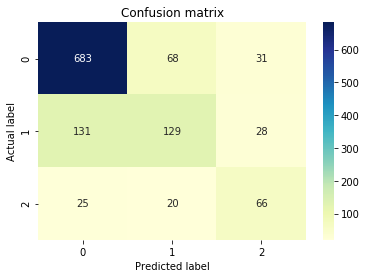

In [410]:
# Creating a Heatmap for the confusion matrix. 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, test_preds_voting)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [386]:
##TEst data
# read the data
test_data=pd.read_csv('./data/test_data.csv')

## print shape of dataset with rows and columns
print(test_data.shape)

##print glimpse of the data
test_data.head()

(1477, 2)


,id,area_code
0,3340,area_344
1,14067,area_933
2,1134,area_16
3,27,area_793
4,9793,area_344


In [388]:
##lets merge with the other files to get the final test data
##to avoid ambiguity i cretaed csv by merging all the files and making volume as categorical
final_test=pd.read_csv('test_final.csv')

In [310]:
##glimpse of the test data
final_test.head()

,id,outage_type_1,outage_type_2,outage_type_3,outage_type_4,outage_type_5,broadband_type_1,broadband_type_10,broadband_type_2,broadband_type_3,broadband_type_4,broadband_type_5,broadband_type_6,broadband_type_7,broadband_type_8,broadband_type_9,transit_server_type_1,transit_server_type_10,transit_server_type_11,transit_server_type_12,transit_server_type_13,transit_server_type_14,transit_server_type_15,transit_server_type_17,transit_server_type_18,transit_server_type_19,transit_server_type_2,transit_server_type_20,transit_server_type_21,transit_server_type_22,transit_server_type_23,transit_server_type_24,transit_server_type_25,transit_server_type_26,transit_server_type_27,transit_server_type_28,transit_server_type_29,transit_server_type_3,transit_server_type_30,transit_server_type_31,transit_server_type_32,transit_server_type_33,transit_server_type_34,transit_server_type_35,transit_server_type_36,transit_server_type_37,transit_server_type_38,transit_server_type_39,transit_server_type_4,transit_server_type_40,transit_server_type_41,transit_server_type_42,transit_server_type_43,transit_server_type_44,transit_server_type_45,transit_server_type_46,transit_server_type_47,transit_server_type_48,transit_server_type_49,transit_server_type_5,transit_server_type_50,transit_server_type_51,transit_server_type_52,transit_server_type_53,transit_server_type_54,transit_server_type_6,transit_server_type_7,transit_server_type_8,transit_server_type_9,log_report_type_1,log_report_type_10,log_report_type_100,log_report_type_101,log_report_type_102,log_report_type_103,log_report_type_104,log_report_type_105,log_report_type_106,log_report_type_107,log_report_type_108,log_report_type_109,log_report_type_11,log_report_type_110,log_report_type_111,log_report_type_112,log_report_type_113,log_report_type_114,log_report_type_115,log_report_type_116,log_report_type_117,log_report_type_118,log_report_type_119,log_report_type_12,log_report_type_120,log_report_type_121,log_report_type_122,log_report_type_123,log_report_type_124,log_report_type_125,log_report_type_126,log_report_type_127,log_report_type_128,log_report_type_129,log_report_type_13,log_report_type_130,log_report_type_131,log_report_type_132,log_report_type_133,log_report_type_134,log_report_type_135,log_report_type_136,log_report_type_137,log_report_type_138,log_report_type_139,log_report_type_14,log_report_type_140,log_report_type_141,log_report_type_142,log_report_type_143,log_report_type_144,log_report_type_145,log_report_type_146,log_report_type_147,log_report_type_148,log_report_type_149,log_report_type_15,log_report_type_150,log_report_type_151,log_report_type_152,log_report_type_153,log_report_type_154,log_report_type_155,log_report_type_156,log_report_type_157,log_report_type_158,log_report_type_159,log_report_type_16,log_report_type_160,log_report_type_161,log_report_type_162,log_report_type_163,log_report_type_164,log_report_type_165,log_report_type_166,log_report_type_167,log_report_type_168,log_report_type_169,log_report_type_17,log_report_type_170,log_report_type_171,log_report_type_172,log_report_type_173,log_report_type_174,log_report_type_175,log_report_type_176,log_report_type_177,log_report_type_178,log_report_type_179,log_report_type_18,log_report_type_180,log_report_type_181,log_report_type_182,log_report_type_183,log_report_type_184,log_report_type_185,log_report_type_186,log_report_type_187,log_report_type_188,log_report_type_189,log_report_type_19,log_report_type_190,log_report_type_191,log_report_type_192,log_report_type_193,log_report_type_194,log_report_type_195,log_report_type_196,log_report_type_197,log_report_type_198,log_report_type_199,log_report_type_2,log_report_type_20,log_report_type_200,log_report_type_201,log_report_type_202,log_report_type_203,log_report_type_204,log_report_type_205,log_report_type_206,log_report_type_207,log_report_type_208,log_report_type_209,log_report_type_21,log_report_type_210,log_report_type_211,log_report_type_212,log_report_type_213,l

In [311]:
##checking the structure
final_test.shape

(1477, 797)

In [330]:
##checking the data types
final_test.dtypes

outage_type_1    int64
outage_type_2    int64
outage_type_3    int64
outage_type_4    int64
outage_type_5    int64
                 ...  
volume_675       int64
volume_717       int64
volume_814       int64
volume_877       int64
volume_1310      int64
Length: 795, dtype: object

In [391]:
##for file submiision iam storing ids from the test fiel in test_ids
test_ids=final_test['id']
test_ids

0           8
1          27
2          53
3          67
4          69
        ...  
1472    18467
1473    18473
1474    18493
1475    18537
1476    18539
Name: id, Length: 1477, dtype: int64

In [393]:
final_test.drop(['id','area_code'], axis=1,inplace=True)

### Model Comparision

LR: 0.656061 (0.018949)
CART: 0.605445 (0.025900)
SVM: 0.654599 (0.025207)
XGB: 0.623385 (0.025419)
RF: 0.647618 (0.023190)
LGBM: 0.657969 (0.018856)
Learning rate set to 0.086162
0:	learn: 1.0390306	total: 380ms	remaining: 6m 19s
1:	learn: 0.9905797	total: 438ms	remaining: 3m 38s
2:	learn: 0.9483236	total: 475ms	remaining: 2m 38s
3:	learn: 0.9191583	total: 488ms	remaining: 2m 1s
4:	learn: 0.8885687	total: 505ms	remaining: 1m 40s
5:	learn: 0.8605507	total: 529ms	remaining: 1m 27s
6:	learn: 0.8385892	total: 560ms	remaining: 1m 19s
7:	learn: 0.8204286	total: 572ms	remaining: 1m 10s
8:	learn: 0.8023813	total: 605ms	remaining: 1m 6s
9:	learn: 0.7887958	total: 631ms	remaining: 1m 2s
10:	learn: 0.7750994	total: 649ms	remaining: 58.4s
11:	learn: 0.7645656	total: 668ms	remaining: 55s
12:	learn: 0.7529965	total: 684ms	remaining: 52s
13:	learn: 0.7409688	total: 737ms	remaining: 51.9s
14:	learn: 0.7326979	total: 757ms	remaining: 49.7s
15:	learn: 0.7234928	total: 770ms	remaining: 47.3s
16:	learn: 

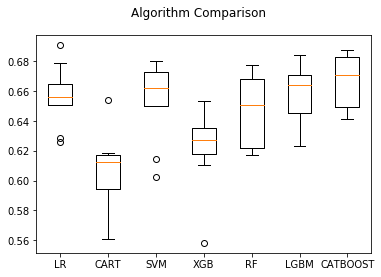

In [417]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
import sklearn
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', xgb.XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('LGBM',LGBMClassifier())) 
models.append(('CATBOOST',CatBoostClassifier()))          


# evaluate each model in turn
results = []
names = []
scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'macro')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scorer)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Model Evalution and Finalizing the Model

### I used Voting classifieras my final model which blends all the model to improve the F1 Score (macro)
 

### Summarizing and conclusion
THere is am improvement in the performance of the modelby using
Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class.<br>
The classes which are predicting wrongly by using this classifier we can overcome this<br>
performance and stabilty of the Model results are good. I submitted the predictions bu using this algorithm<br>
Used Validation efforts like  fold cross validation and train_test_split,stratify<br>
USed OVR and OVO to convert multicallsses into Binary<br>
Smote Technique to control th imbalance<br>
Implemented regularisation to control the overfit by hyperparametr tuning<br>
Used feature selction methods lke feature importance and coreltion plot to reduce dimensioanlities


F1 Score
F1 score is the harmonic mean of precision and recall.

$$\text{F}_1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

### SUBMISSION FILE

In [395]:
## preductions from voting soft classifier
preds=voting_clf_soft.predict(final_test)
## converting into dataframe
final_sample_df=pd.DataFrame(preds)
##concatinating with ids and predicitons
final_df=pd.concat([test_ids,final_sample_df], axis=1)
##adding the columns
final_df.columns=['id','outage_duration']
##submission file is ready
final_df.to_csv("Phd_submission_3523.csv",index=False)

                                                *****THE END*****